# Data Analysis Module Exploratory Data Analysis
## Using Airbnb dataset

In [ ]:
#connect to my_drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
#from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Step1: Data Loading and Initial Exploration:

In [ ]:
# Explore reviews dataset
# 1.Load
Reviews_csv = pd.read_csv('/content/drive/MyDrive/T5/week3/project_airbnb/Reviews.csv')

# 2. Display datasets information
print("*** Reviews dataset ***")
print("\nNumber of rows and columns:", Reviews_csv.shape)
print("******"*10)
print("Data types of columns:")
print(Reviews_csv.dtypes)
print("******"*10)
print("First rows in reviews dataset:")
print(Reviews_csv.head())


*** Reviews dataset ***

Number of rows and columns: (5373143, 4)
************************************************************
Data types of columns:
listing_id      int64
review_id       int64
date           object
reviewer_id     int64
dtype: object
************************************************************
First rows in reviews dataset:
   listing_id  review_id        date  reviewer_id
0       11798  330265172  2018-09-30     11863072
1       15383  330103585  2018-09-30     39147453
2       16455  329985788  2018-09-30      1125378
3       17919  330016899  2018-09-30    172717984
4       26827  329995638  2018-09-30     17542859


In [ ]:
# Explore reviews dataset
# 1.Load
Listings_csv = pd.read_csv('/content/drive/MyDrive/T5/week3/project_airbnb/Listings.csv', encoding='ISO-8859-1')

# 2. Display datasets information
print("\n*** Listings dataset ***")
print("\nNumber of rows and columns:", Listings_csv.shape)
print("******"*10)
print("Data types of columns:")
print(Listings_csv.dtypes)
print("******"*10)
print("First rows in listings dataset:")
print(Listings_csv.head())

<ipython-input-4-c35629e6c263>:3: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Listings_csv = pd.read_csv('/content/drive/MyDrive/T5/week3/project_airbnb/Listings.csv', encoding='ISO-8859-1')



*** Listings dataset ***

Number of rows and columns: (279712, 33)
************************************************************
Data types of columns:
listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                    

In [ ]:
# merge 2 dataset
merged_dataset = pd.merge(Reviews_csv, Listings_csv, on='listing_id') # on column that exisit in both dataset


In [ ]:
merged_dataset.shape

(5373143, 36)

In [ ]:
merged_dataset.describe()

,listing_id,review_id,reviewer_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,...,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5.373143e+06,5.373143e+06,5.373143e+06,5.373143e+06,3.897510e+06,4.624706e+06,5.369204e+06,5.373143e+06,5.373143e+06,5.373143e+06,...,5.373143e+06,5.373143e+06,5.373143e+06,5.367038e+06,5.333880e+06,5.334072e+06,5.333805e+06,5.333909e+06,5.333797e+06,5.333784e+06
mean,1.602989e+07,3.486753e+08,9.808133e+07,6.469994e+07,9.349517e-01,9.046293e-01,6.994412e+00,2.430075e+01,3.871891e+00,3.449121e+00,...,3.958410e+02,5.926587e+00,1.367270e+05,9.458122e+01,9.728649e+00,9.498194e+00,9.834714e+00,9.828395e+00,9.750743e+00,9.469799e+00
std,1.198676e+07,2.061019e+08,9.080596e+07,7.826077e+07,1.892012e-01,1.992040e-01,2.598255e+01,2.984013e+01,6.950395e+01,2.023092e+00,...,2.423261e+03,3.336257e+01,1.670686e+07,4.603214e+00,5.155600e-01,6.690645e-01,4.256188e-01,4.360953e-01,4.912554e-01,5.992379e-01
min,2.577000e+03,2.820000e+02,1.000000e+00,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.426440e+01,-9.933963e+01,1.000000e+00,...,8.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
25%,5.332708e+06,1.666435e+08,2.390206e+07,8.803928e+06,1.000000e+00,9.100000e-01,1.000000e+00,1.377266e+01,-4.339491e+01,2.000000e+00,...,6.600000e+01,1.000000e+00,4.500000e+01,9.300000e+01,1.000000e+01,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.000000e+00
50%,1.450814e+07,3.425727e+08,6.697814e+07,3.082557e+07,1.000000e+00,1.000000e+00,2.000000e+00,4.077147e+01,2.377040e+00,3.000000e+00,...,1.150000e+02,2.000000e+00,1.125000e+03,9.600000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
75%,2.414496e+07,5.334045e+08,1.528936e+08,9.478960e+07,1.000000e+00,1.000000e+00,5.000000e+00,4.190838e+01,1.838436e+01,4.000000e+00,...,3.280000e+02,3.000000e+00,1.125000e+03,9.800000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
max,4.826387e+07,7.356237e+08,3.903385e+08,3.893169e+08,1.000000e+00,1.000000e+00,7.235000e+03,4.890425e+01,1.513397e+02,1.600000e+01,...,3.001770e+05,9.999000e+03,2.147484e+09,1.000000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373143 entries, 0 to 5373142
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   listing_id                   int64  
 1   review_id                    int64  
 2   date                         object 
 3   reviewer_id                  int64  
 4   name                         object 
 5   host_id                      int64  
 6   host_since                   object 
 7   host_location                object 
 8   host_response_time           object 
 9   host_response_rate           float64
 10  host_acceptance_rate         float64
 11  host_is_superhost            object 
 12  host_total_listings_count    float64
 13  host_has_profile_pic         object 
 14  host_identity_verified       object 
 15  neighbourhood                object 
 16  district                     object 
 17  city                         object 
 18  latitude                     float64
 19  

In [ ]:
merged_dataset

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,11798,330265172,2018-09-30,11863072,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,11798,437228860,2019-04-14,3153099,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,11798,274915772,2018-06-10,13021254,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,11798,284327934,2018-07-01,74131694,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,11798,223467265,2018-01-01,39665778,Loft very charming in Paris,44444,2009-10-08,"Paris, Ile-de-France, France",NaN,NaN,...,2,20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516,appartamento silenzioso vicino centro commerciale,385086212,2021-01-18,IT,within a few hours,0.80,...,1,14,80.0,10.0,8.0,10.0,10.0,10.0,8.0,t
5373139,47823964,727963021,2021-01-31,76411977,Futuristic rides in our world of home feelings,385460858,2021-01-21,"Rome, Lazio, Italy",a few days or more,0.33,...,1,14,20.0,2.0,2.0,2.0,2.0,2.0,2.0,f
5373140,47896175,728548625,2021-02-02,71370946,BBHOME Gazometro & Street art,340212816,2020-03-04,"Rome, Lazio, Italy",within an hour,1.00,...,1,30,100.0,10.0,10.0,10.0,10.0,10.0,6.0,t
5373141,47900451,727399287,2021-01-29,109011160,Trevi Diamond Lady Boutique,385074346,2021-01-18,IT,a few days or more,0.00,...,1,1125,20.0,2.0,2.0,2.0,2.0,2.0,2.0,t


# Step2: Data Cleaning:

## Handling Missing data (if any)

In [ ]:
merged_dataset.isnull()

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5373139,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5373140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5373141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# check missing data
merged_dataset.isnull().sum()

listing_id                           0
review_id                            0
date                                 0
reviewer_id                          0
name                               333
host_id                              0
host_since                        3939
host_location                     7910
host_response_time             1475633
host_response_rate             1475633
host_acceptance_rate            748437
host_is_superhost                 3939
host_total_listings_count         3939
host_has_profile_pic              3939
host_identity_verified            3939
neighbourhood                        0
district                       4525416
city                                 0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                        541413
amenities                            0
price                    

There is a lot of null values  ; (

In [ ]:
# create a fcuntion to find and display NAs
def count_NAs(dfna, perc):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {round(numOfNAs/numOfRows * 100.00,2)}')
        if ((numOfNAs/numOfRows) * 100.000) >= perc:
           NaList.append(i)
    print(f'columns with NAs over {perc}%: {NaList}')
    return NaList
# Display NAs
cutoff = 40
NAs = count_NAs(merged_dataset, cutoff)
print(f"Total with NAs over {cutoff}% column number :",len(NAs))



listing_id                    , Rows: 5373143, NAs: 0                        , precentage: 0.0
review_id                     , Rows: 5373143, NAs: 0                        , precentage: 0.0
date                          , Rows: 5373143, NAs: 0                        , precentage: 0.0
reviewer_id                   , Rows: 5373143, NAs: 0                        , precentage: 0.0
name                          , Rows: 5373143, NAs: 333                      , precentage: 0.01
host_id                       , Rows: 5373143, NAs: 0                        , precentage: 0.0
host_since                    , Rows: 5373143, NAs: 3939                     , precentage: 0.07
host_location                 , Rows: 5373143, NAs: 7910                     , precentage: 0.15
host_response_time            , Rows: 5373143, NAs: 1475633                  , precentage: 27.46
host_response_rate            , Rows: 5373143, NAs: 1475633                  , precentage: 27.46
host_acceptance_rate          , Rows: 53731

In [ ]:
# handling missing values
# 1. district column has many null values I decide to drop it (columns with NAs over 40%: ['district'])
merged_dataset.drop(columns = ['district'] , inplace = True)

In [ ]:
# 2. fill name column with "Unkown"
merged_dataset['name'].fillna('unknown' , inplace = True)

In [ ]:
# 3. I decide to replace null numerical values with the mean
numeric_columns = merged_dataset.select_dtypes(include = ['float64' , 'int64']).columns
imputer = SimpleImputer(strategy='mean')
merged_dataset[numeric_columns] = imputer.fit_transform(merged_dataset[numeric_columns])

In [ ]:
# 4. I decide to replace null categorical values with the mode
categorical_columns = merged_dataset.select_dtypes(include = ['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
merged_dataset[categorical_columns] = imputer.fit_transform(merged_dataset[categorical_columns])

In [ ]:
# check the null values after cleaning
merged_dataset.isnull().sum()

listing_id                     0
review_id                      0
date                           0
reviewer_id                    0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_sco

No more null values : )

## Handling duplicate rows (if any)

In [ ]:
# check if there any duplicate
merged_dataset[merged_dataset.duplicated()]

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


No duplicte rows ; )

## Convert categorical variables

In [ ]:
# Convert categorical variables into the appropriate data type (to category)
category_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',  'city', 'property_type', 'room_type', 'instant_bookable']
merged_dataset[category_cols] = merged_dataset[category_cols].astype('category')

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373143 entries, 0 to 5373142
Data columns (total 35 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   listing_id                   float64 
 1   review_id                    float64 
 2   date                         object  
 3   reviewer_id                  float64 
 4   name                         object  
 5   host_id                      float64 
 6   host_since                   object  
 7   host_location                object  
 8   host_response_time           object  
 9   host_response_rate           float64 
 10  host_acceptance_rate         float64 
 11  host_is_superhost            category
 12  host_total_listings_count    float64 
 13  host_has_profile_pic         category
 14  host_identity_verified       category
 15  neighbourhood                category
 16  city                         category
 17  latitude                     float64 
 18  longitude             

In [ ]:
merged_dataset.head(10)

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,11798.0,330265172.0,2018-09-30,11863072.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,11798.0,437228860.0,2019-04-14,3153099.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,11798.0,274915772.0,2018-06-10,13021254.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,11798.0,284327934.0,2018-07-01,74131694.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,11798.0,223467265.0,2018-01-01,39665778.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,11798.0,466341506.0,2019-06-09,51006903.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,11798.0,161702205.0,2017-06-18,54609768.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,11798.0,339921593.0,2018-10-22,206690700.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,11798.0,248746645.0,2018-04-01,27055245.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,11798.0,246310837.0,2018-03-25,45135749.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,2.0,20.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f


# Step 3: EDA

## Conduct Univariate Analysis

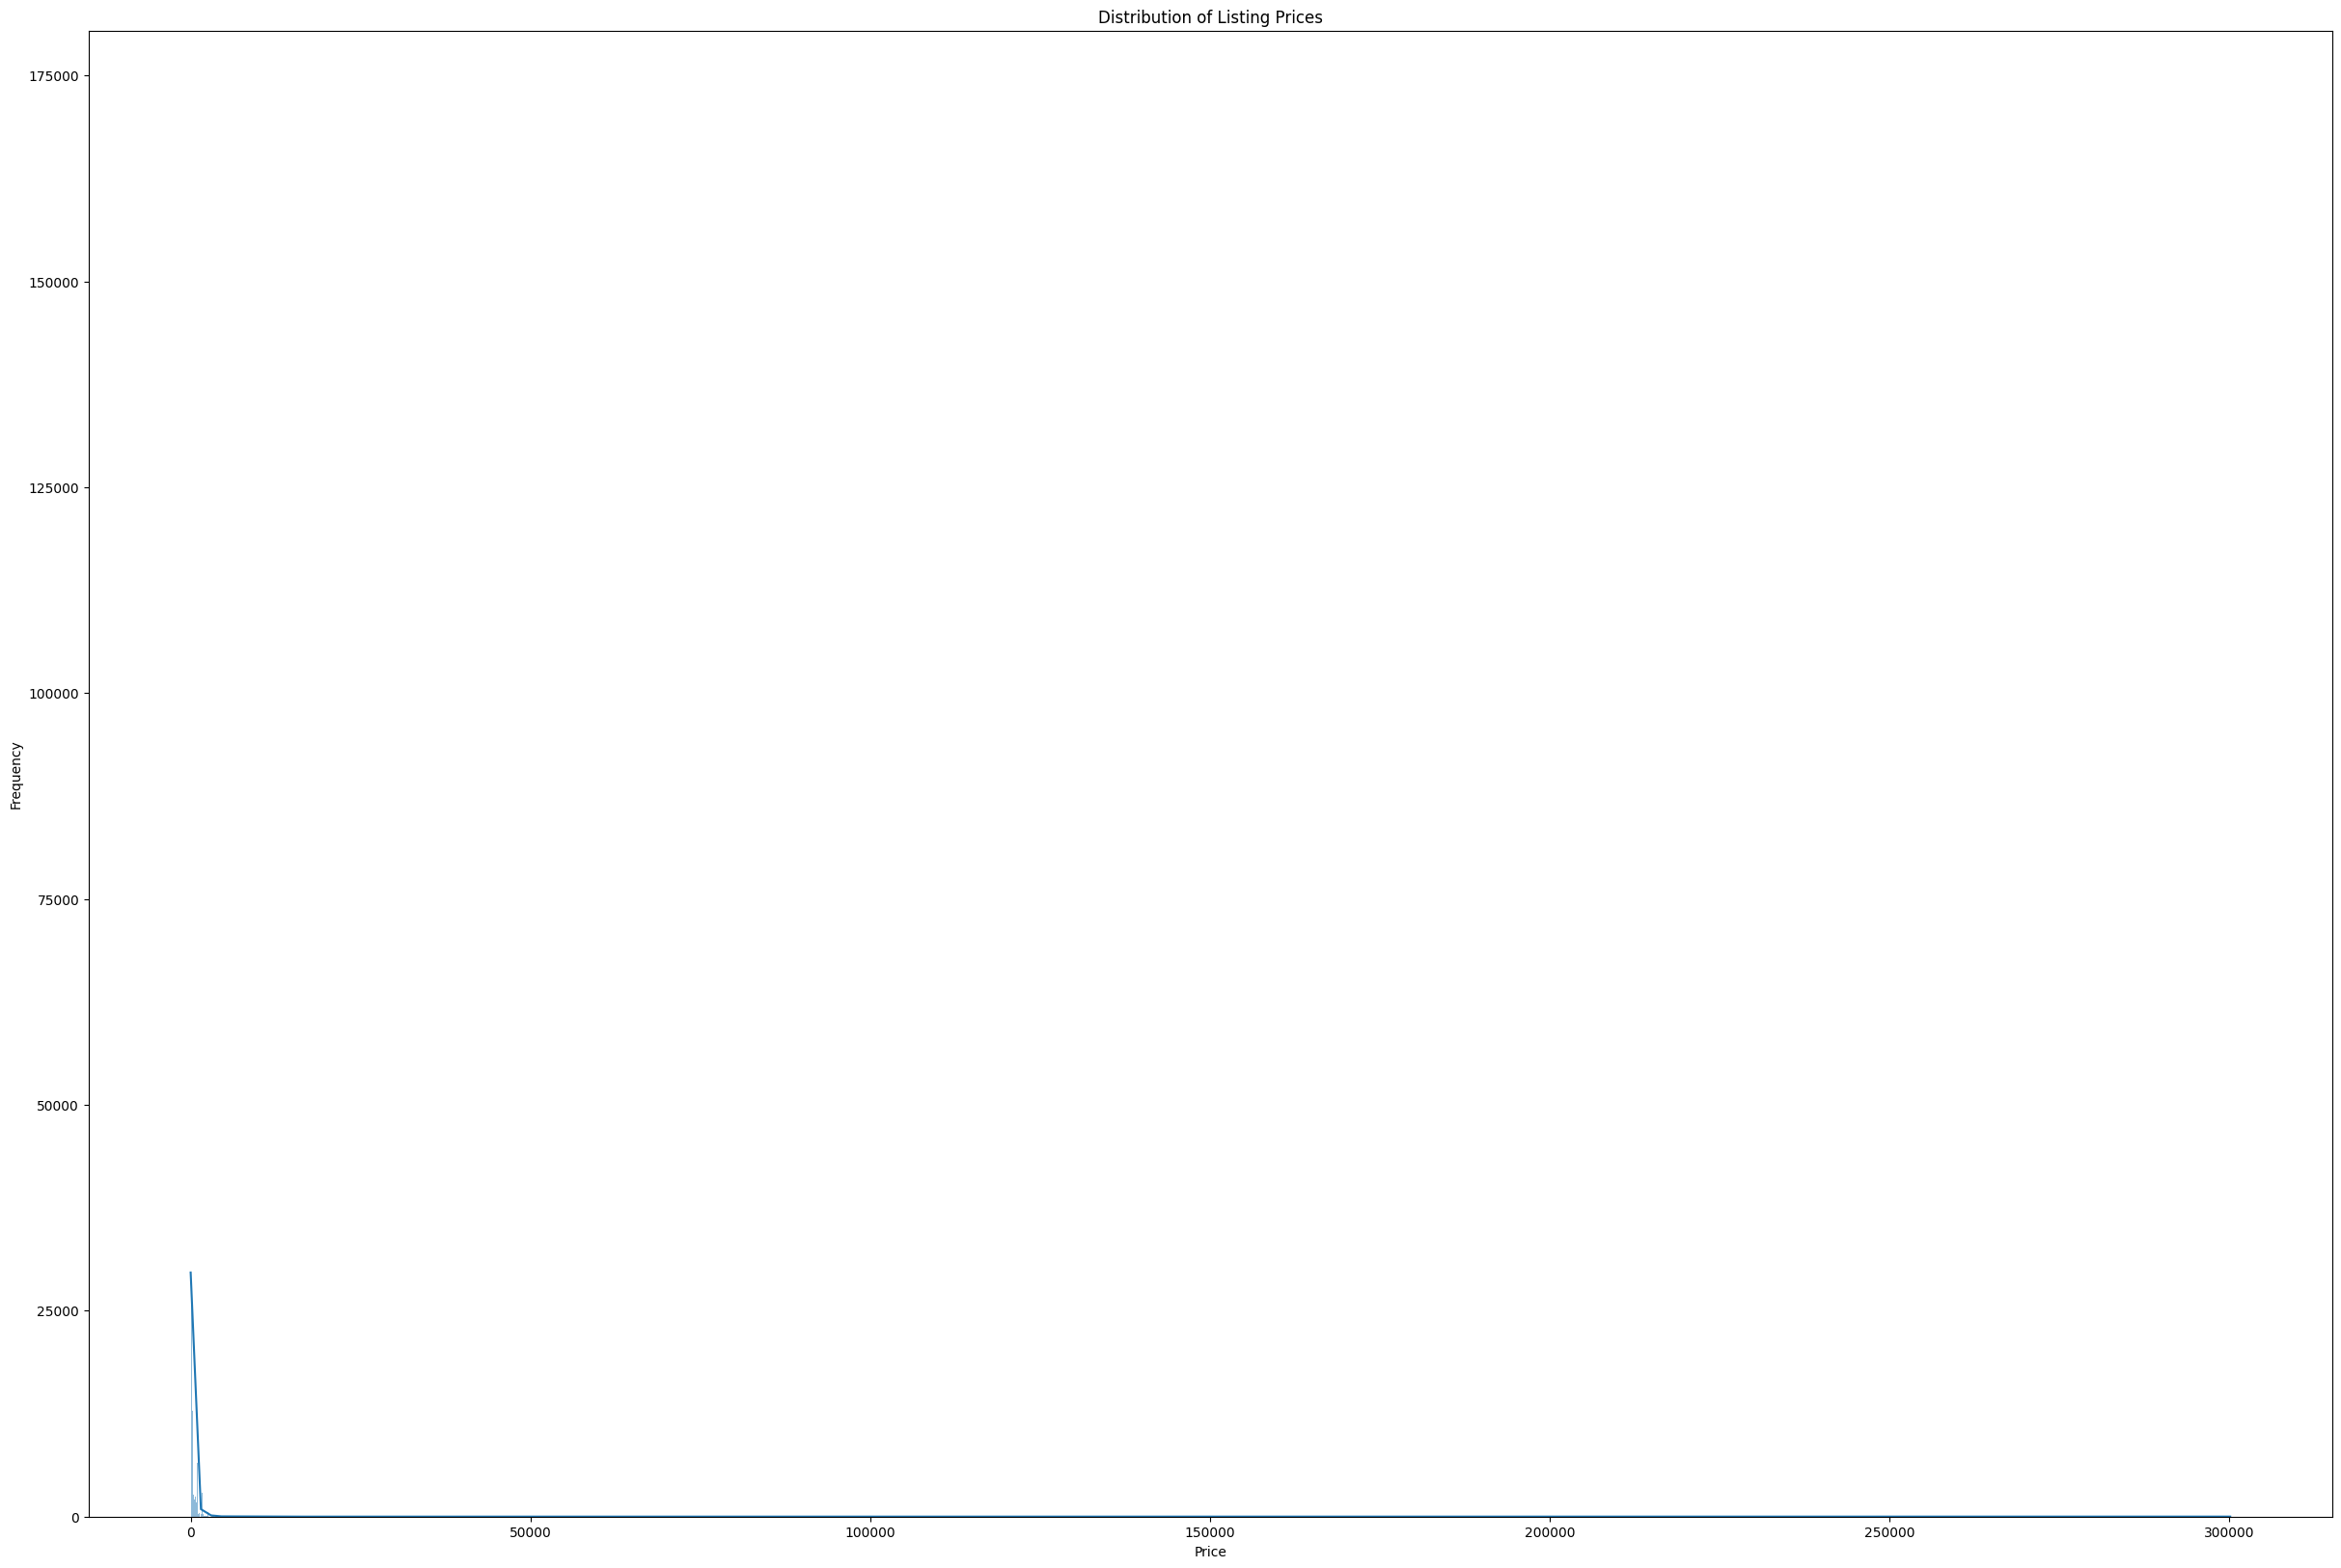

In [ ]:
plt.figure(figsize=(30, 20))
sns.histplot(merged_dataset['price'], kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

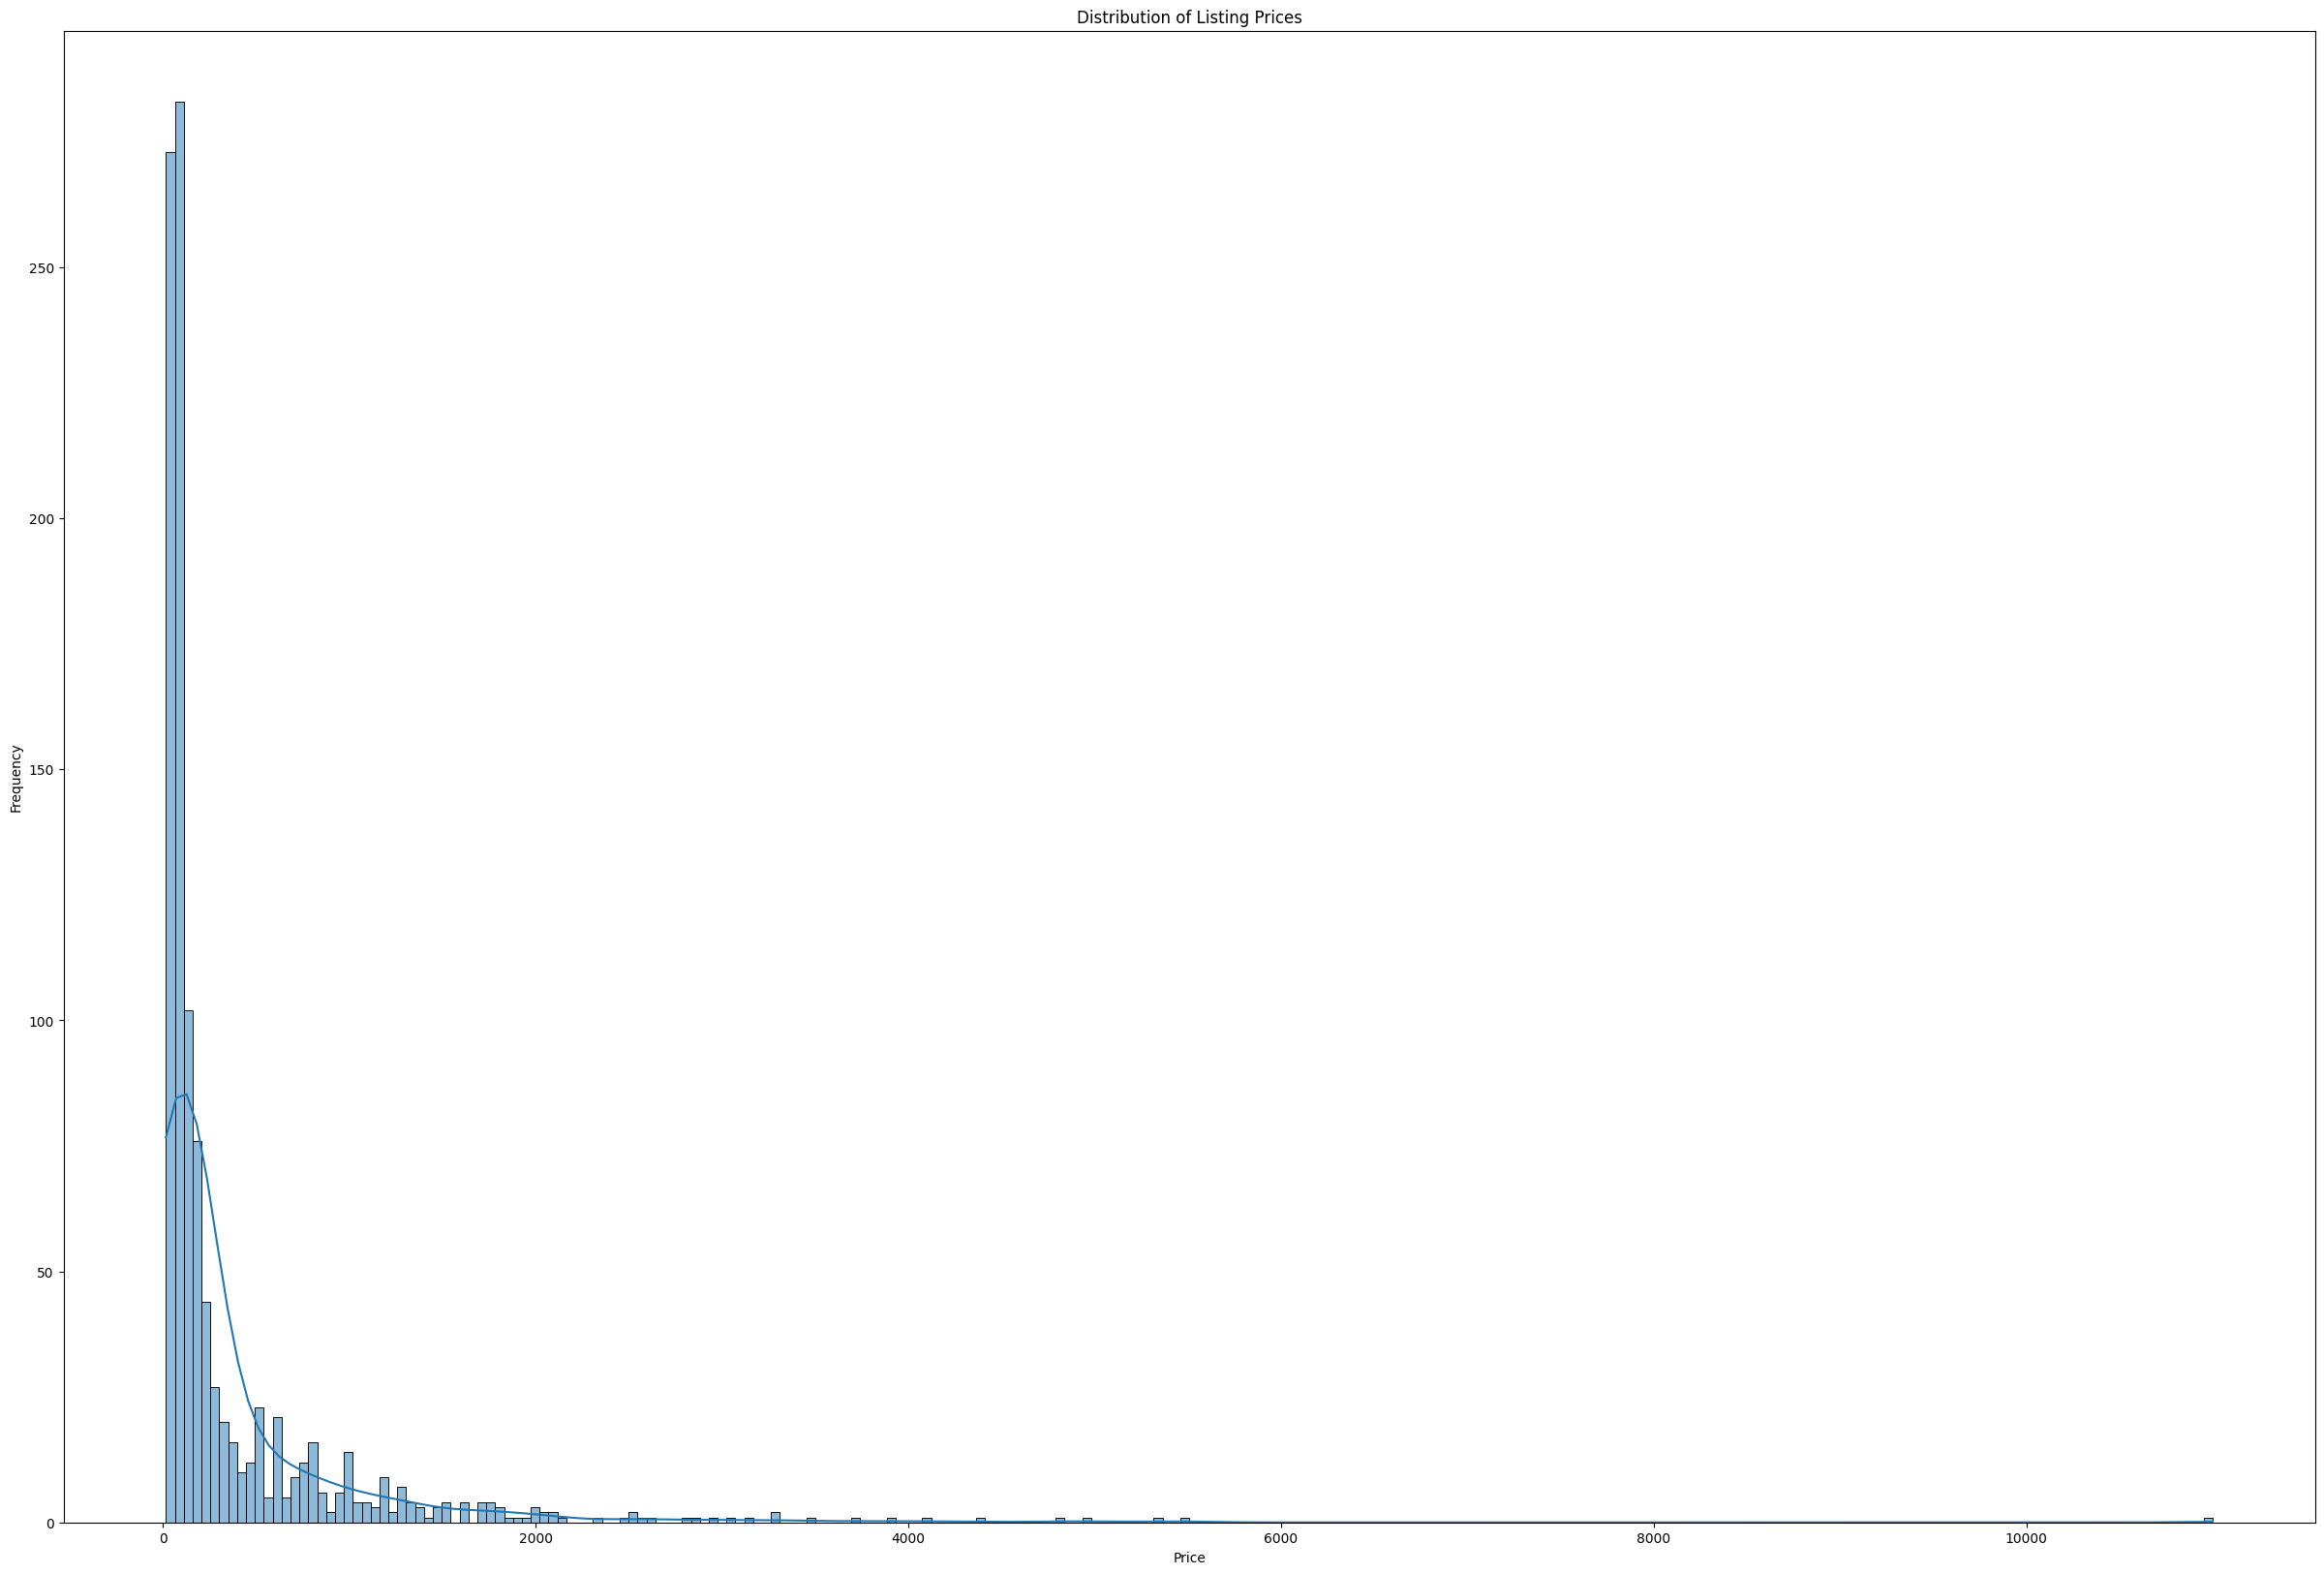

In [ ]:
# 1. Distribution of listing prices
sampled_df = merged_dataset.sample(frac=0.0002)  # Scince we are dealing with big data i have just take 0.02% random sample from the dataset
plt.figure(figsize=(30, 20))
sns.histplot(sampled_df['price'], kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

we can see that the distribution of the price is not normal Positive Skewness (Right Skewed)

In [ ]:
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

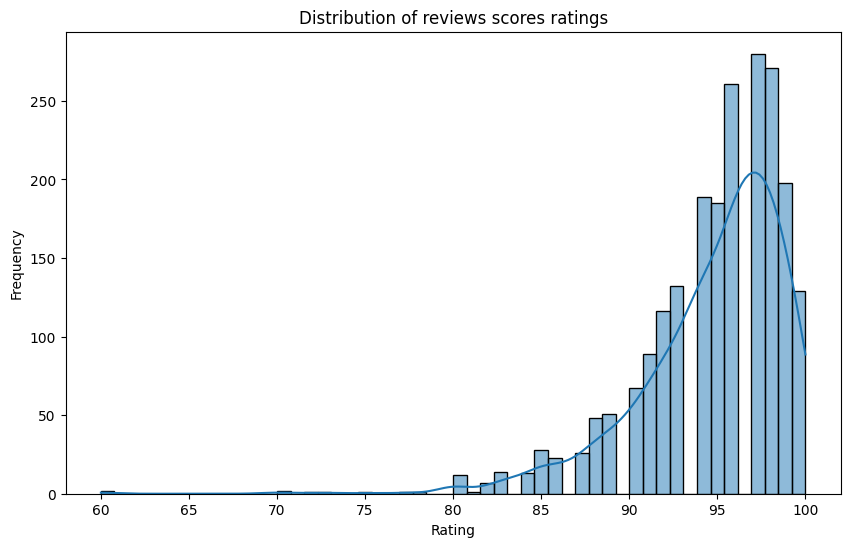

In [ ]:
# 2. Distribution of number of reviews
sampled_df = merged_dataset.sample(frac=0.0004)  # Scince we are dealing with big data i have just take 0.04% random sample from the dataset
plt.figure(figsize=(10, 6))
sns.histplot(sampled_df['review_scores_rating'], kde=True)
plt.title('Distribution of reviews scores ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

we can see that the distribution of the review_scores_rating is not normal Negative Skewness (Left Skewed)

## Bivariate Analysis

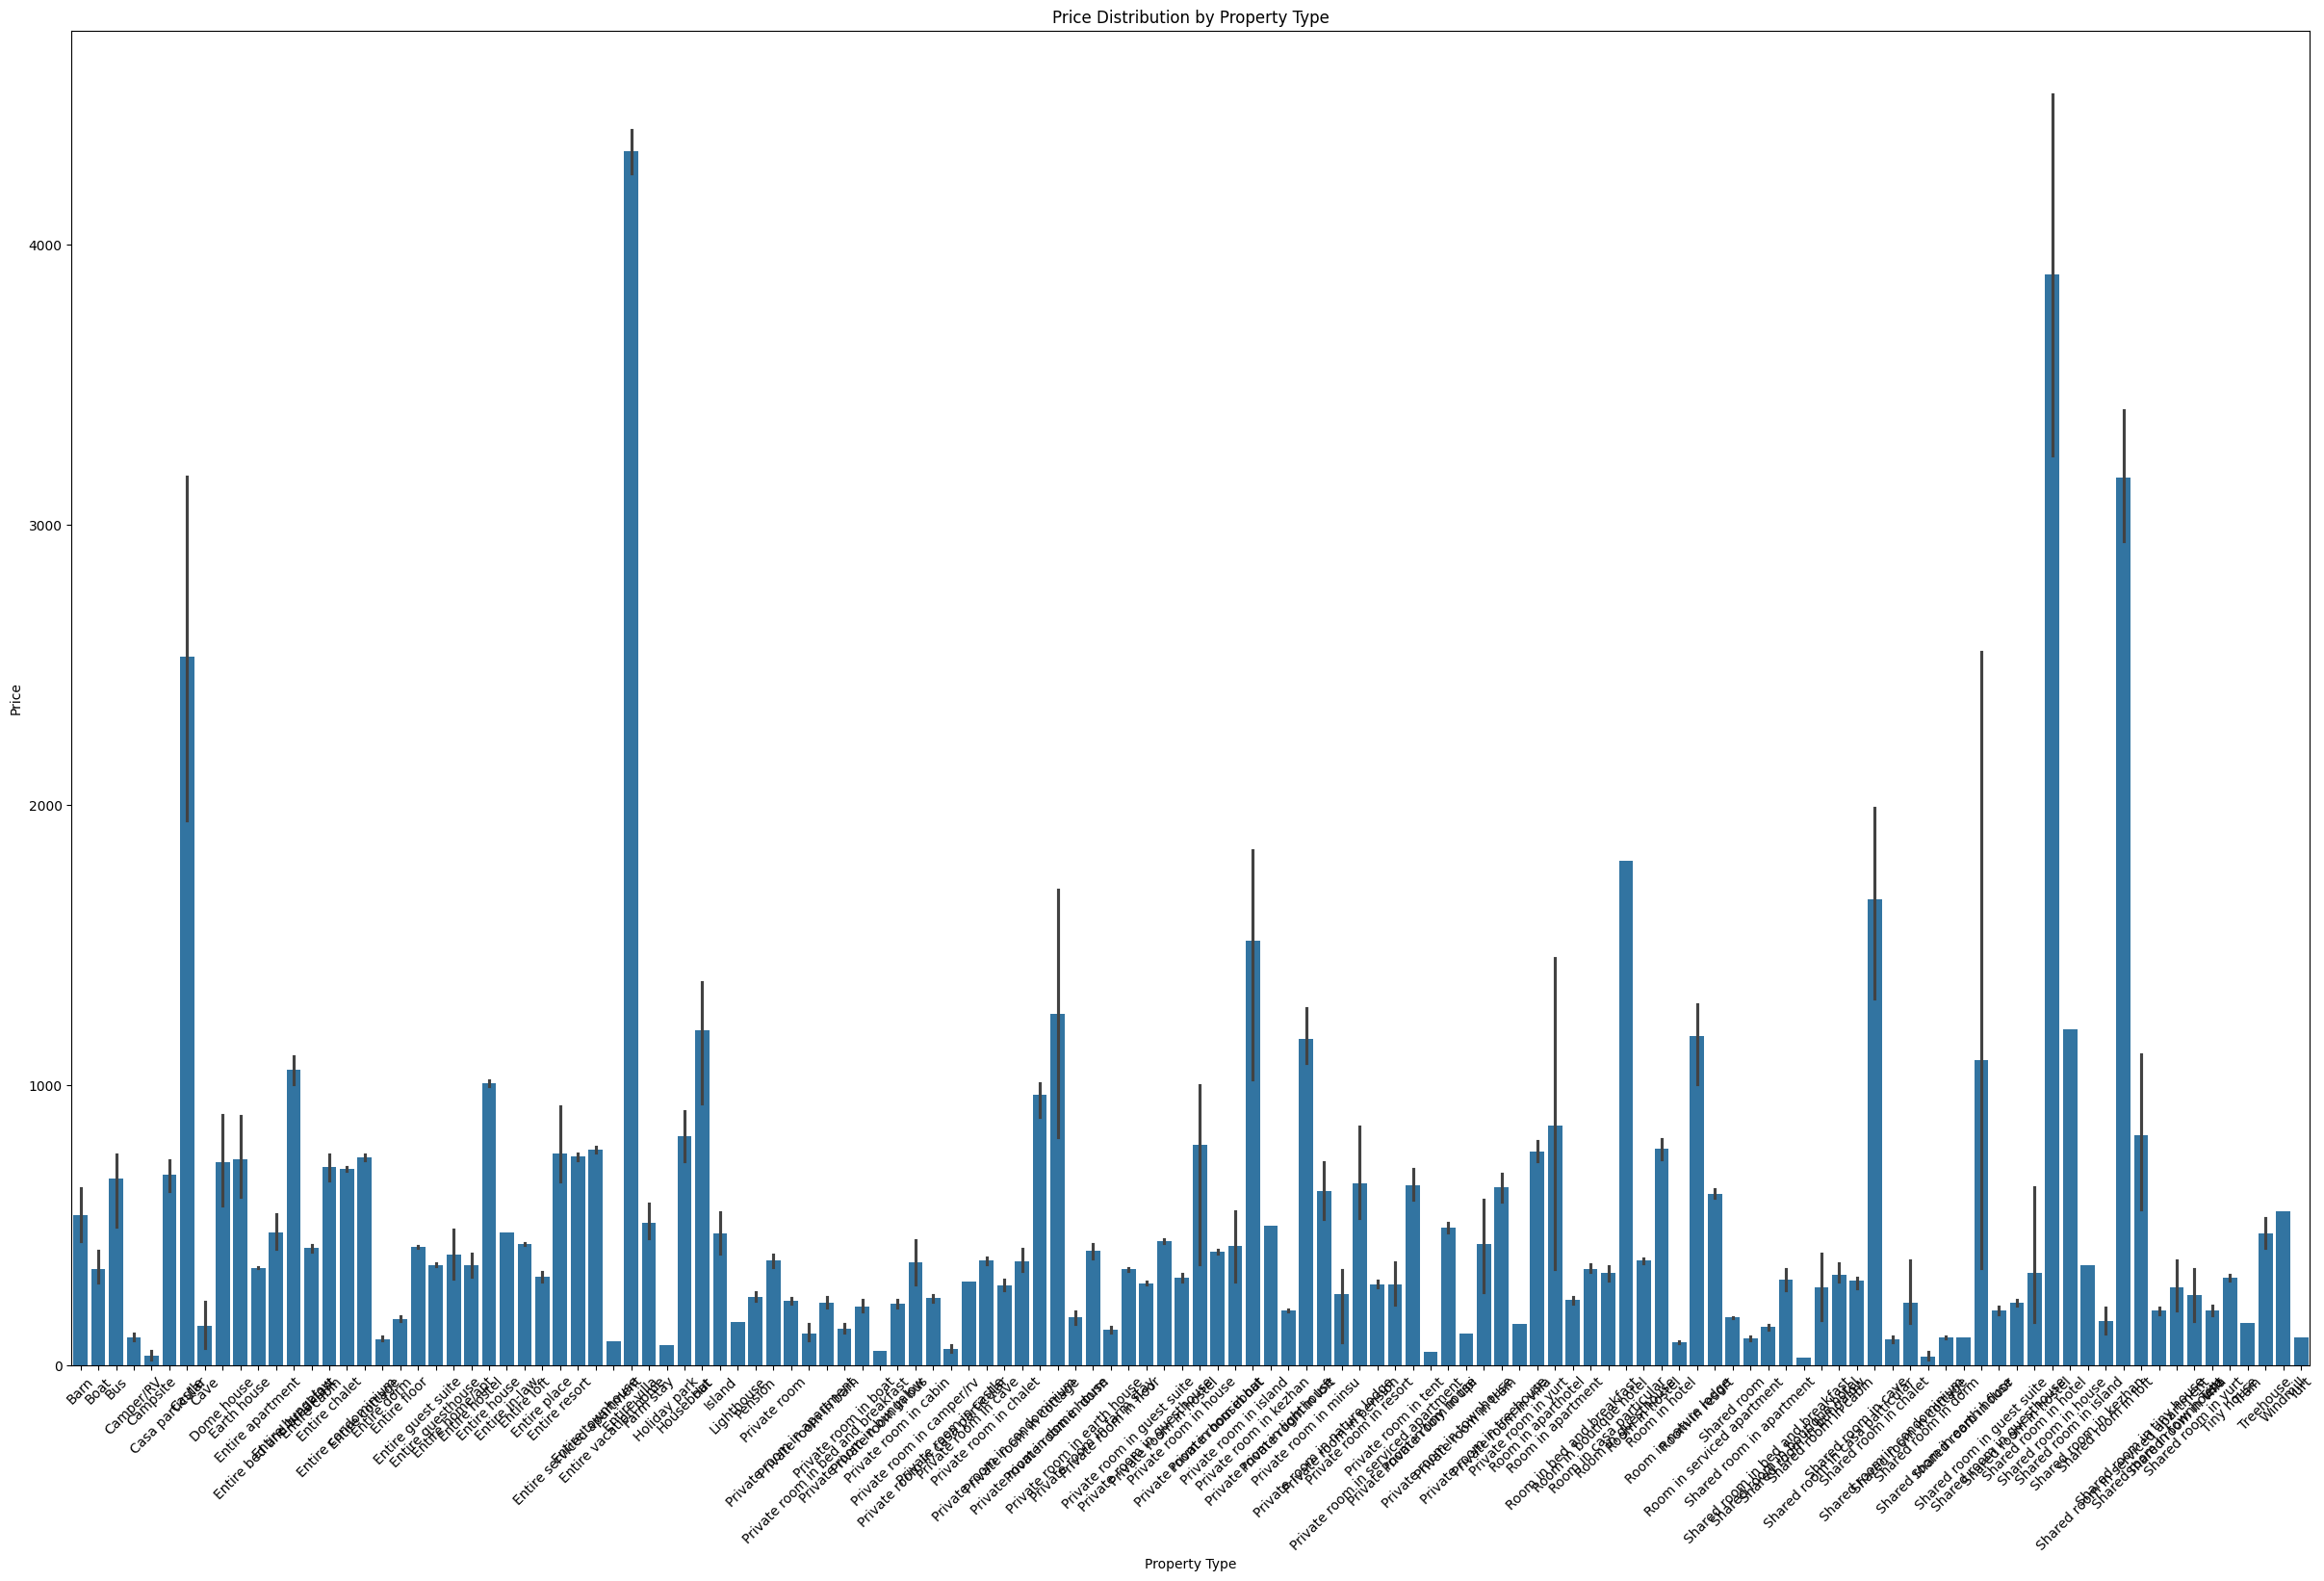

In [ ]:
# price vs. property (float vs category)
plt.figure(figsize=(30, 18))
sns.barplot(data=merged_dataset, x='property_type', y='price')
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Because we are dealing with huge data, the graph does not appear appropriately and cannot be used in this way. We must look for an alternative solution. :(

In [ ]:
# types of property
property_types_series = merged_dataset['property_type'].astype(str)
unique_property_types = property_types_series.unique()
print(unique_property_types)

['Entire loft' 'Entire apartment' 'Private room in apartment'
 'Private room in bed and breakfast' 'Shared room in apartment'
 'Entire townhouse' 'Private room in house' 'Entire house'
 'Entire condominium' 'Private room in guest suite' 'Boat'
 'Entire guesthouse' 'Private room in condominium'
 'Entire bed and breakfast' 'Private room in nature lodge' 'Entire villa'
 'Private room in loft' 'Room in hotel' 'Private room in guesthouse'
 'Room in bed and breakfast' 'Room in boutique hotel'
 'Shared room in tiny house' 'Private room in townhouse'
 'Entire serviced apartment' 'Private room in serviced apartment'
 'Room in aparthotel' 'Room in serviced apartment' 'Room in hostel'
 'Shared room in loft' 'Entire floor' 'Entire guest suite'
 'Private room in boat' 'Entire place' 'Shared room in hostel'
 'Shared room in condominium' 'Private room' 'Tiny house'
 'Private room in villa' 'Private room in earth house'
 'Shared room in townhouse' 'Private room in hostel' 'Entire bungalow'
 'Houseboat

i will do visualization for the most common categories and group the other as "other".

In [ ]:
# the most common type
Top_category = merged_dataset['property_type'].value_counts().head(30).index.tolist()

# the other gategory group them as other
merged_dataset['property_group'] = merged_dataset['property_type'].apply(lambda x:x if x in Top_category else 'other')

In [ ]:
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'property_group'],
      dtype='object')

In [ ]:
merged_dataset['property_group'].unique() #top 30

array(['Entire loft', 'Entire apartment', 'Private room in apartment',
       'Private room in bed and breakfast', 'Shared room in apartment',
       'Entire townhouse', 'Private room in house', 'Entire house',
       'Entire condominium', 'Private room in guest suite', 'other',
       'Entire guesthouse', 'Private room in condominium', 'Entire villa',
       'Private room in loft', 'Room in hotel',
       'Private room in guesthouse', 'Room in bed and breakfast',
       'Room in boutique hotel', 'Private room in townhouse',
       'Entire serviced apartment', 'Private room in serviced apartment',
       'Room in aparthotel', 'Room in serviced apartment',
       'Room in hostel', 'Entire guest suite', 'Shared room in hostel',
       'Tiny house', 'Private room in hostel', 'Entire bungalow',
       'Entire cottage'], dtype=object)

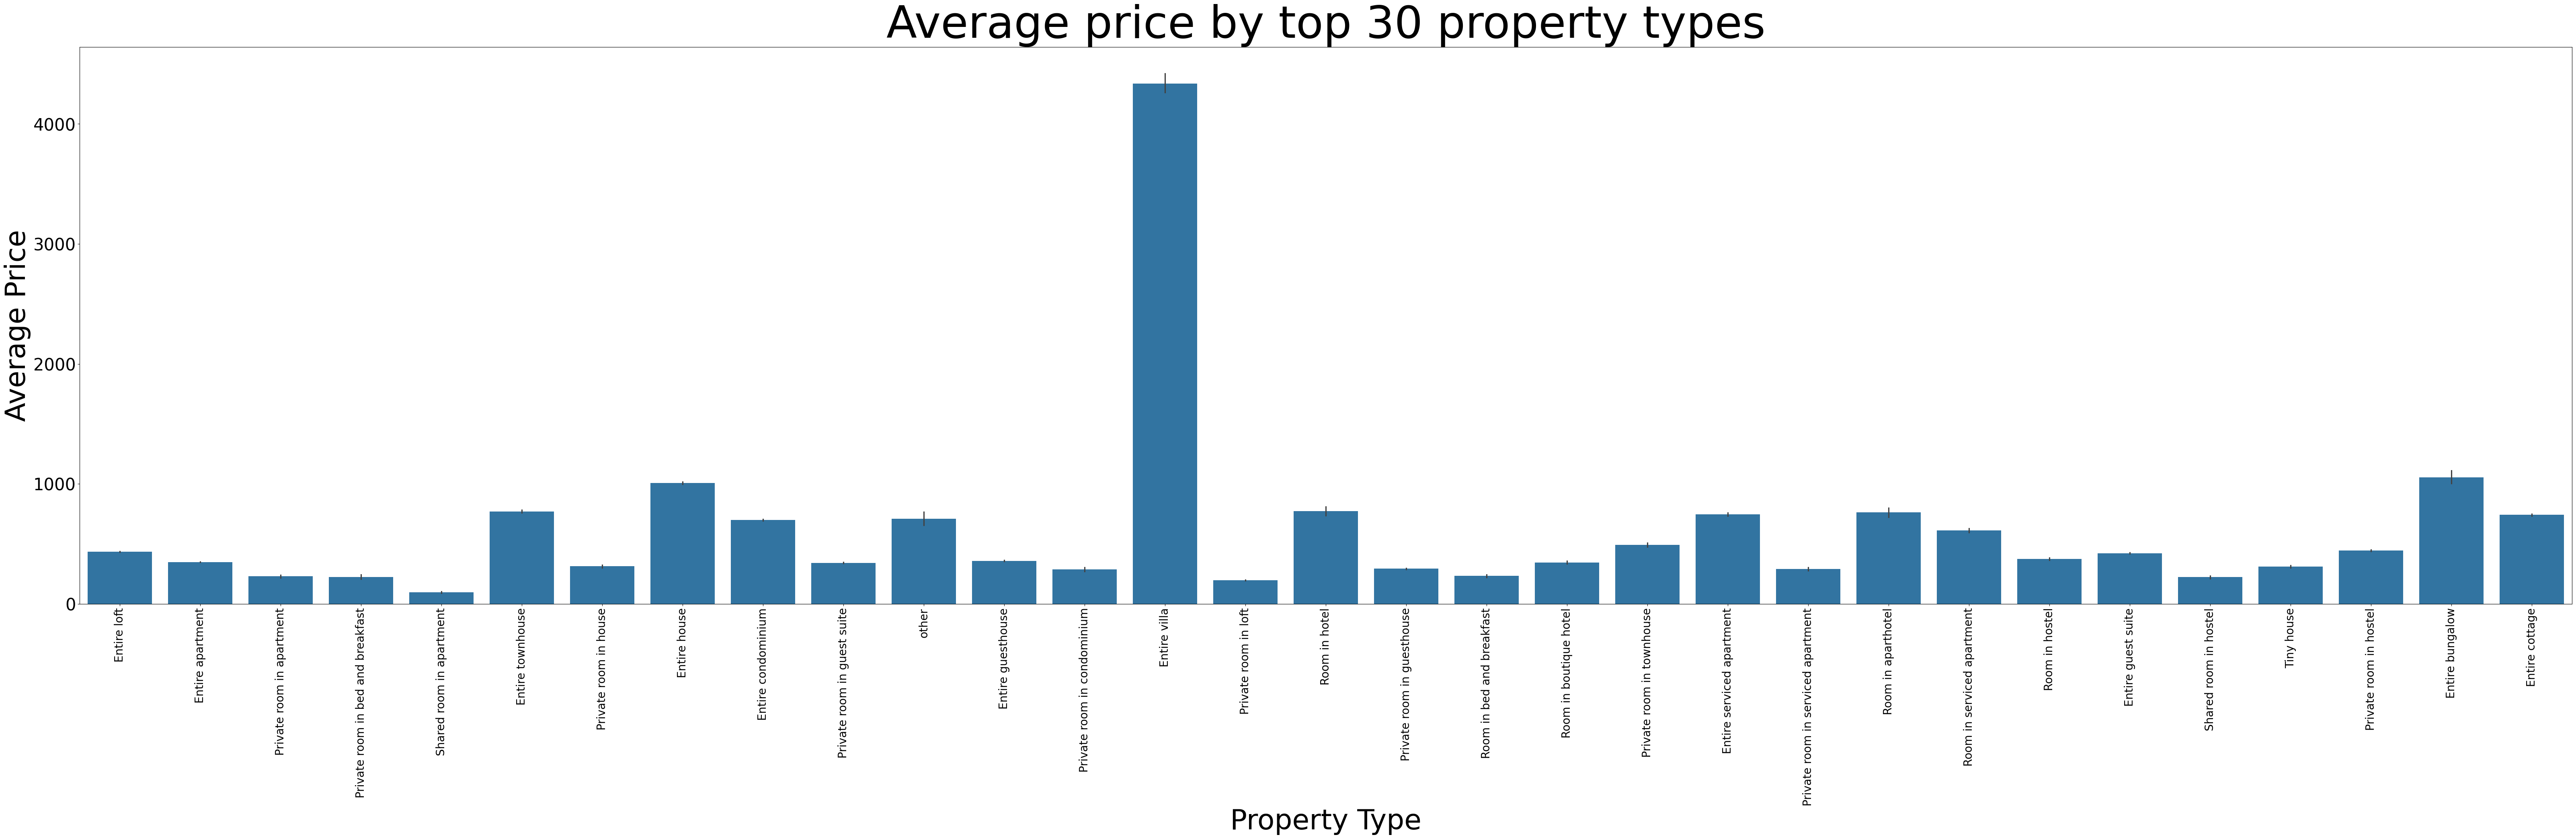

In [ ]:
# price vs. property (float vs category)

plt.figure(figsize=(80,18))
sns.barplot(data=merged_dataset , x ='property_group' , y ='price')
plt.title("Average price by top 30 property types" , fontsize=80)
plt.xlabel('Property Type' , fontsize=50)
plt.ylabel('Average Price' , fontsize=50)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=30)
plt.show()

We can see that "Villas" is the most expesive type

In [ ]:
# price vs. neighborhood
merged_dataset['neighbourhood'].unique()

['Gobelins', 'Buttes-Montmartre', 'Opera', 'Buttes-Chaumont', 'Hotel-de-Ville', ..., 'IX Eur', 'XIV Monte Mario', 'III Monte Sacro', 'VI Roma delle Torri', 'Sultanbeyli']
Length: 631
Categories (631, object): ['Abolicao', 'Adalar', 'Allerton', 'Alto da Boa Vista', ..., 'Yan na wa',
                           'Yau Tsim Mong', 'Yuen Long', 'Zeytinburnu']

In [ ]:
# types of neighbourhood
neighbourhood_series = merged_dataset['neighbourhood'].astype(str)
neighbourhood_types = neighbourhood_series.unique()
print(neighbourhood_types)

['Gobelins' 'Buttes-Montmartre' 'Opera' 'Buttes-Chaumont' 'Hotel-de-Ville'
 'Elysee' 'Louvre' 'Menilmontant' 'Observatoire' 'Reuilly' 'Vaugirard'
 'Popincourt' 'Bourse' 'Enclos-St-Laurent' 'Batignolles-Monceau' 'Temple'
 'Luxembourg' 'Passy' 'Pantheon' 'Palais-Bourbon' 'East Village'
 'Clinton Hill' 'Bedford-Stuyvesant' 'Tribeca' 'Gowanus' 'Harlem'
 'Williamsburg' 'Lower East Side' 'Bushwick' 'Park Slope' 'Greenpoint'
 "Hell's Kitchen" 'Sunnyside' 'Fort Greene' 'Upper West Side' 'Rego Park'
 'Kensington' 'Windsor Terrace' 'East Harlem' 'Kips Bay' 'Two Bridges'
 'Prospect Heights' 'Boerum Hill' 'Financial District' 'Sunset Park'
 'Upper East Side' 'Allerton' 'Prospect-Lefferts Gardens' 'Flatbush'
 'Crown Heights' 'West Village' 'Astoria' 'Carroll Gardens'
 'Theater District' 'Cobble Hill' 'Canarsie' 'Bay Ridge' 'East Flatbush'
 'SoHo' 'Long Island City' 'Ditmars Steinway' 'Cypress Hills' 'Red Hook'
 'Richmond Hill' 'Greenwich Village' 'Midtown' 'South Slope' 'Chelsea'
 'Washington Heigh

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


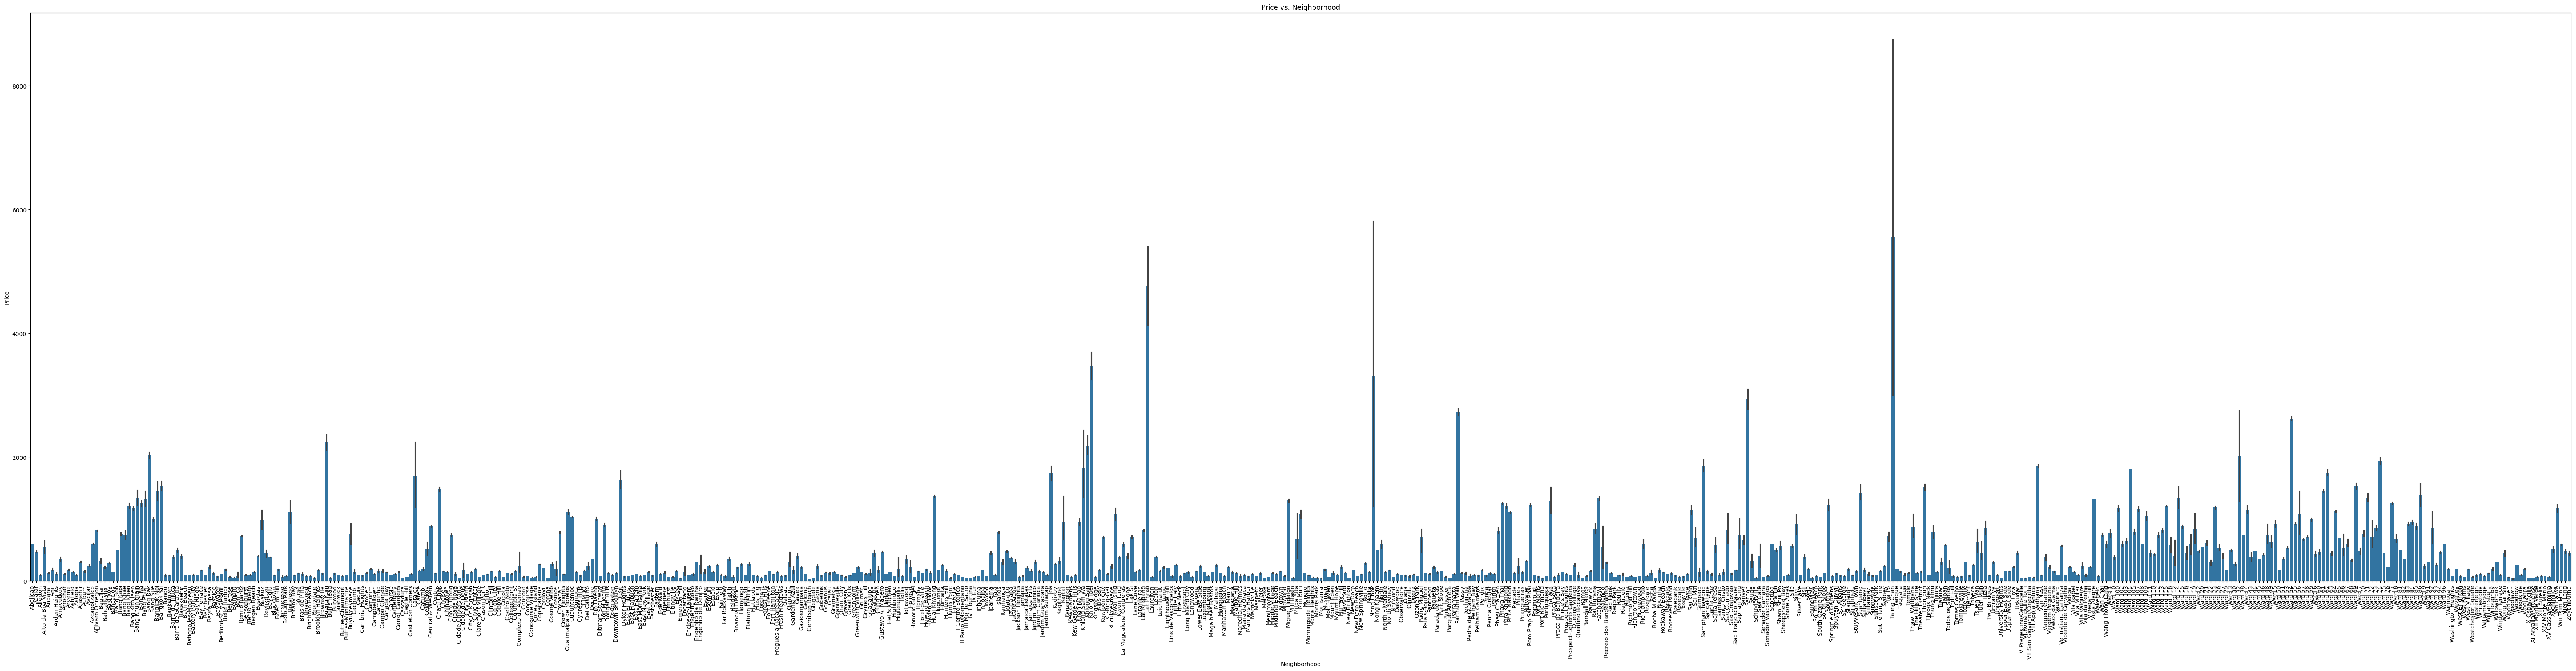

In [ ]:
plt.figure(figsize=(80, 18))
sns.barplot(data=merged_dataset, x='neighbourhood', y='price')
plt.title('Price vs. Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

a lot of neighborhood ;(

In [ ]:
# price vs. neighborhood
# the most common neighborhood
Top_neighbourhood = merged_dataset['neighbourhood'].value_counts().head(20).index.tolist()

# the other gategory group them as other
merged_dataset['neighbourhood_group'] = merged_dataset['neighbourhood'].apply(lambda x:x if x in Top_neighbourhood else 'other')

In [ ]:
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'property_group',
       'neighbourhood_group'],
      dtype='object')

In [ ]:
merged_dataset['neighbourhood_group'].unique() # top 20

array(['other', 'Buttes-Montmartre', 'Opera', 'Vaugirard', 'Popincourt',
       'Bourse', 'Enclos-St-Laurent', 'Batignolles-Monceau', 'Temple',
       'Bedford-Stuyvesant', 'Yau Tsim Mong', 'Cuauhtemoc',
       'Miguel Hidalgo', 'Ward 115', 'Copacabana', 'Sydney', 'Beyoglu',
       'I Centro Storico', 'XIII Aurelia', 'II Parioli/Nomentano',
       'VII San Giovanni/Cinecitta'], dtype=object)

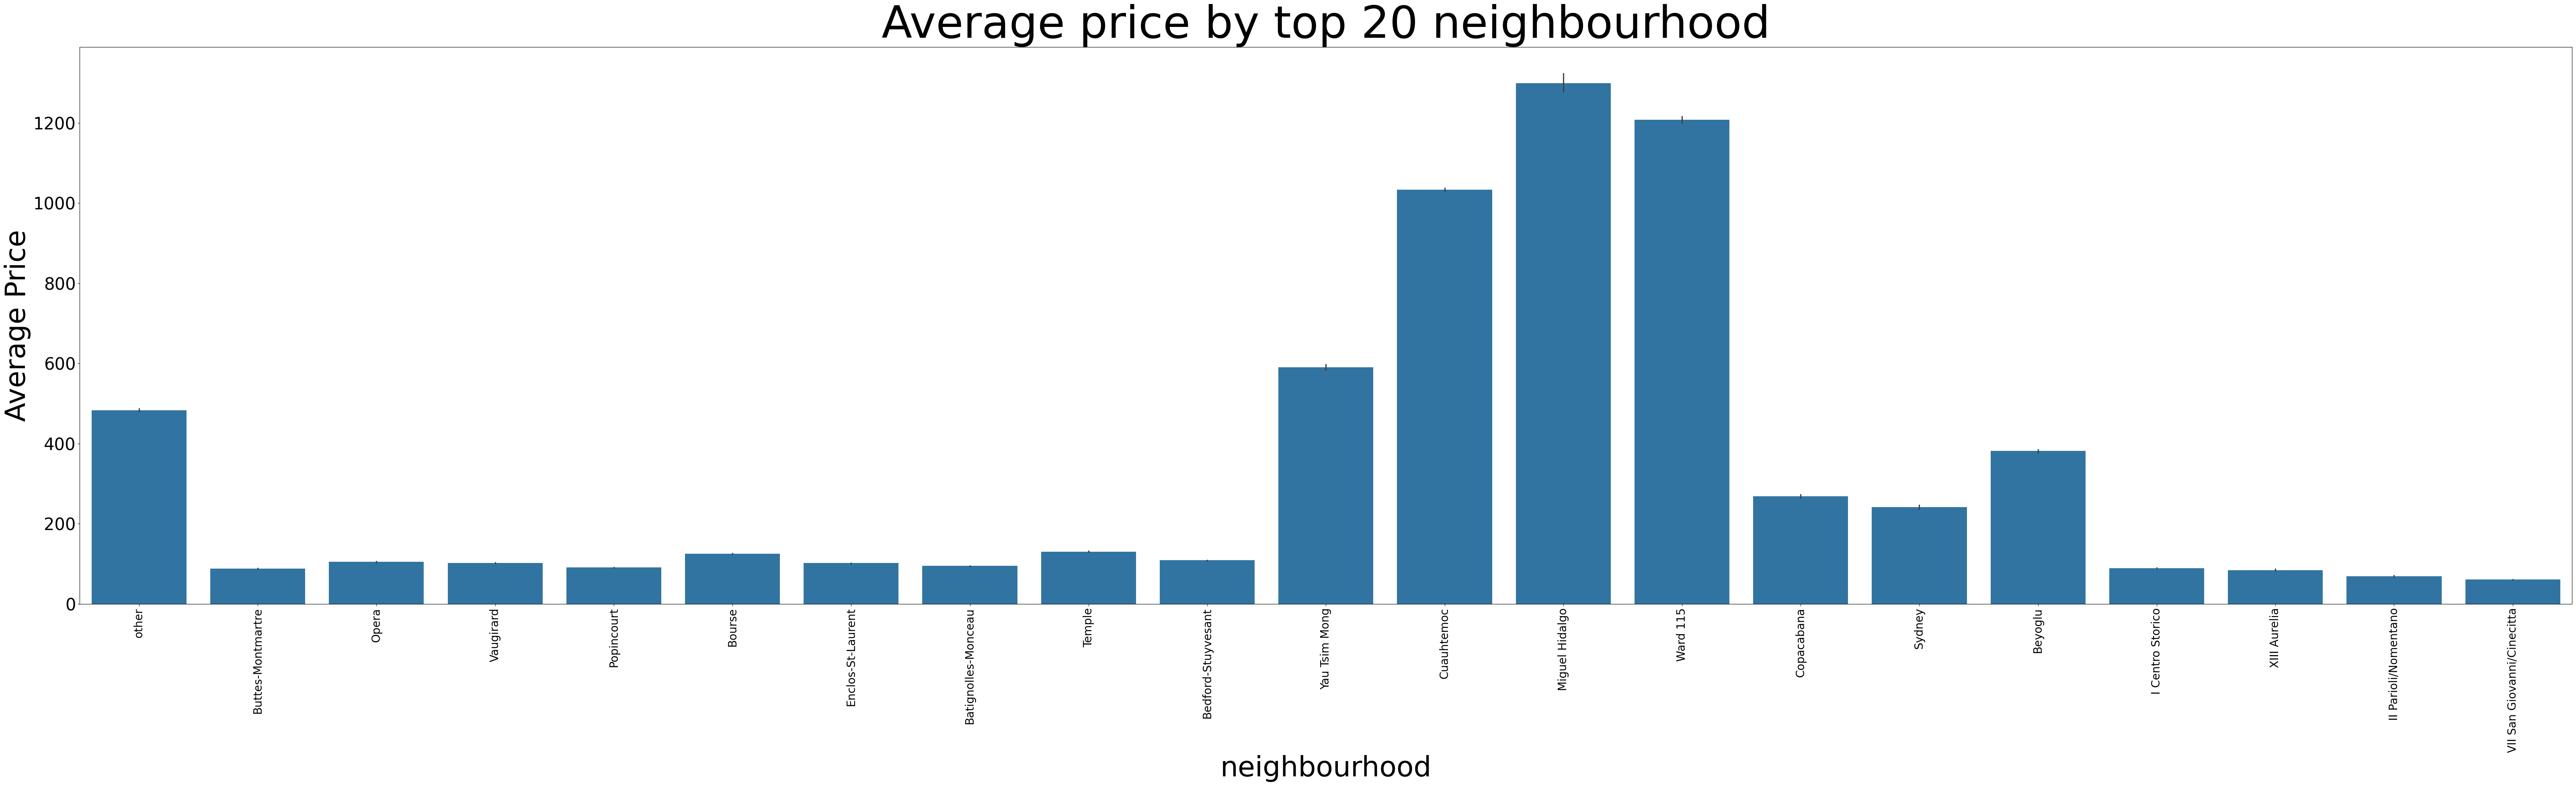

In [ ]:
# price vs. neighborhood
plt.figure(figsize=(80,18))
sns.barplot(data=merged_dataset , x ='neighbourhood_group' , y ='price')
plt.title("Average price by top 20 neighbourhood" , fontsize=80)
plt.xlabel('neighbourhood' , fontsize=50)
plt.ylabel('Average Price' , fontsize=50)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=30)
plt.show()

we can see the the most expensive neighbourhood is "Miguel Hidalgo" in Mexico

## Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.)


In [ ]:
# calculate the average price for accomodations in each city
AveragePrice_city = merged_dataset.groupby('city')['price'].mean().sort_values()
print(AveragePrice_city)

city
Rome                81.285026
Paris              108.533496
New York           122.163961
Sydney             197.979847
Rio de Janeiro     356.698281
Istanbul           373.125646
Hong Kong          660.476681
Mexico City        968.679472
Cape Town         1428.313671
Bangkok           1880.728594
Name: price, dtype: float64


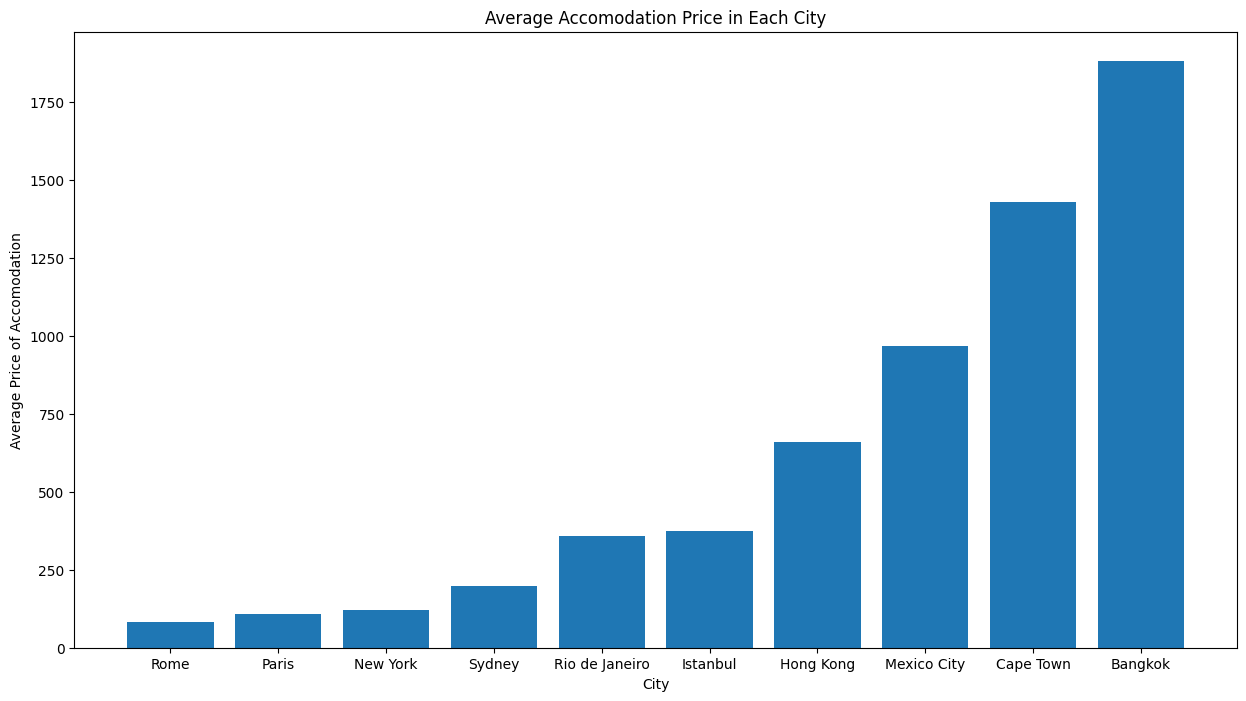

In [ ]:
plt.figure(figsize = (15,8))
plt.bar(AveragePrice_city.index, AveragePrice_city.values)
plt.title('Average Accomodation Price in Each City')
plt.ylabel('Average Price of Accomodation')
plt.xlabel('City')
plt.show()

Rome offers better value for travel as the average price of accommodation is lower than other cities. Bangkok average price of accommodation is the highest.

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373143 entries, 0 to 5373142
Data columns (total 37 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   listing_id                   float64 
 1   review_id                    float64 
 2   date                         object  
 3   reviewer_id                  float64 
 4   name                         object  
 5   host_id                      float64 
 6   host_since                   object  
 7   host_location                object  
 8   host_response_time           object  
 9   host_response_rate           float64 
 10  host_acceptance_rate         float64 
 11  host_is_superhost            category
 12  host_total_listings_count    float64 
 13  host_has_profile_pic         category
 14  host_identity_verified       category
 15  neighbourhood                category
 16  city                         category
 17  latitude                     float64 
 18  longitude             

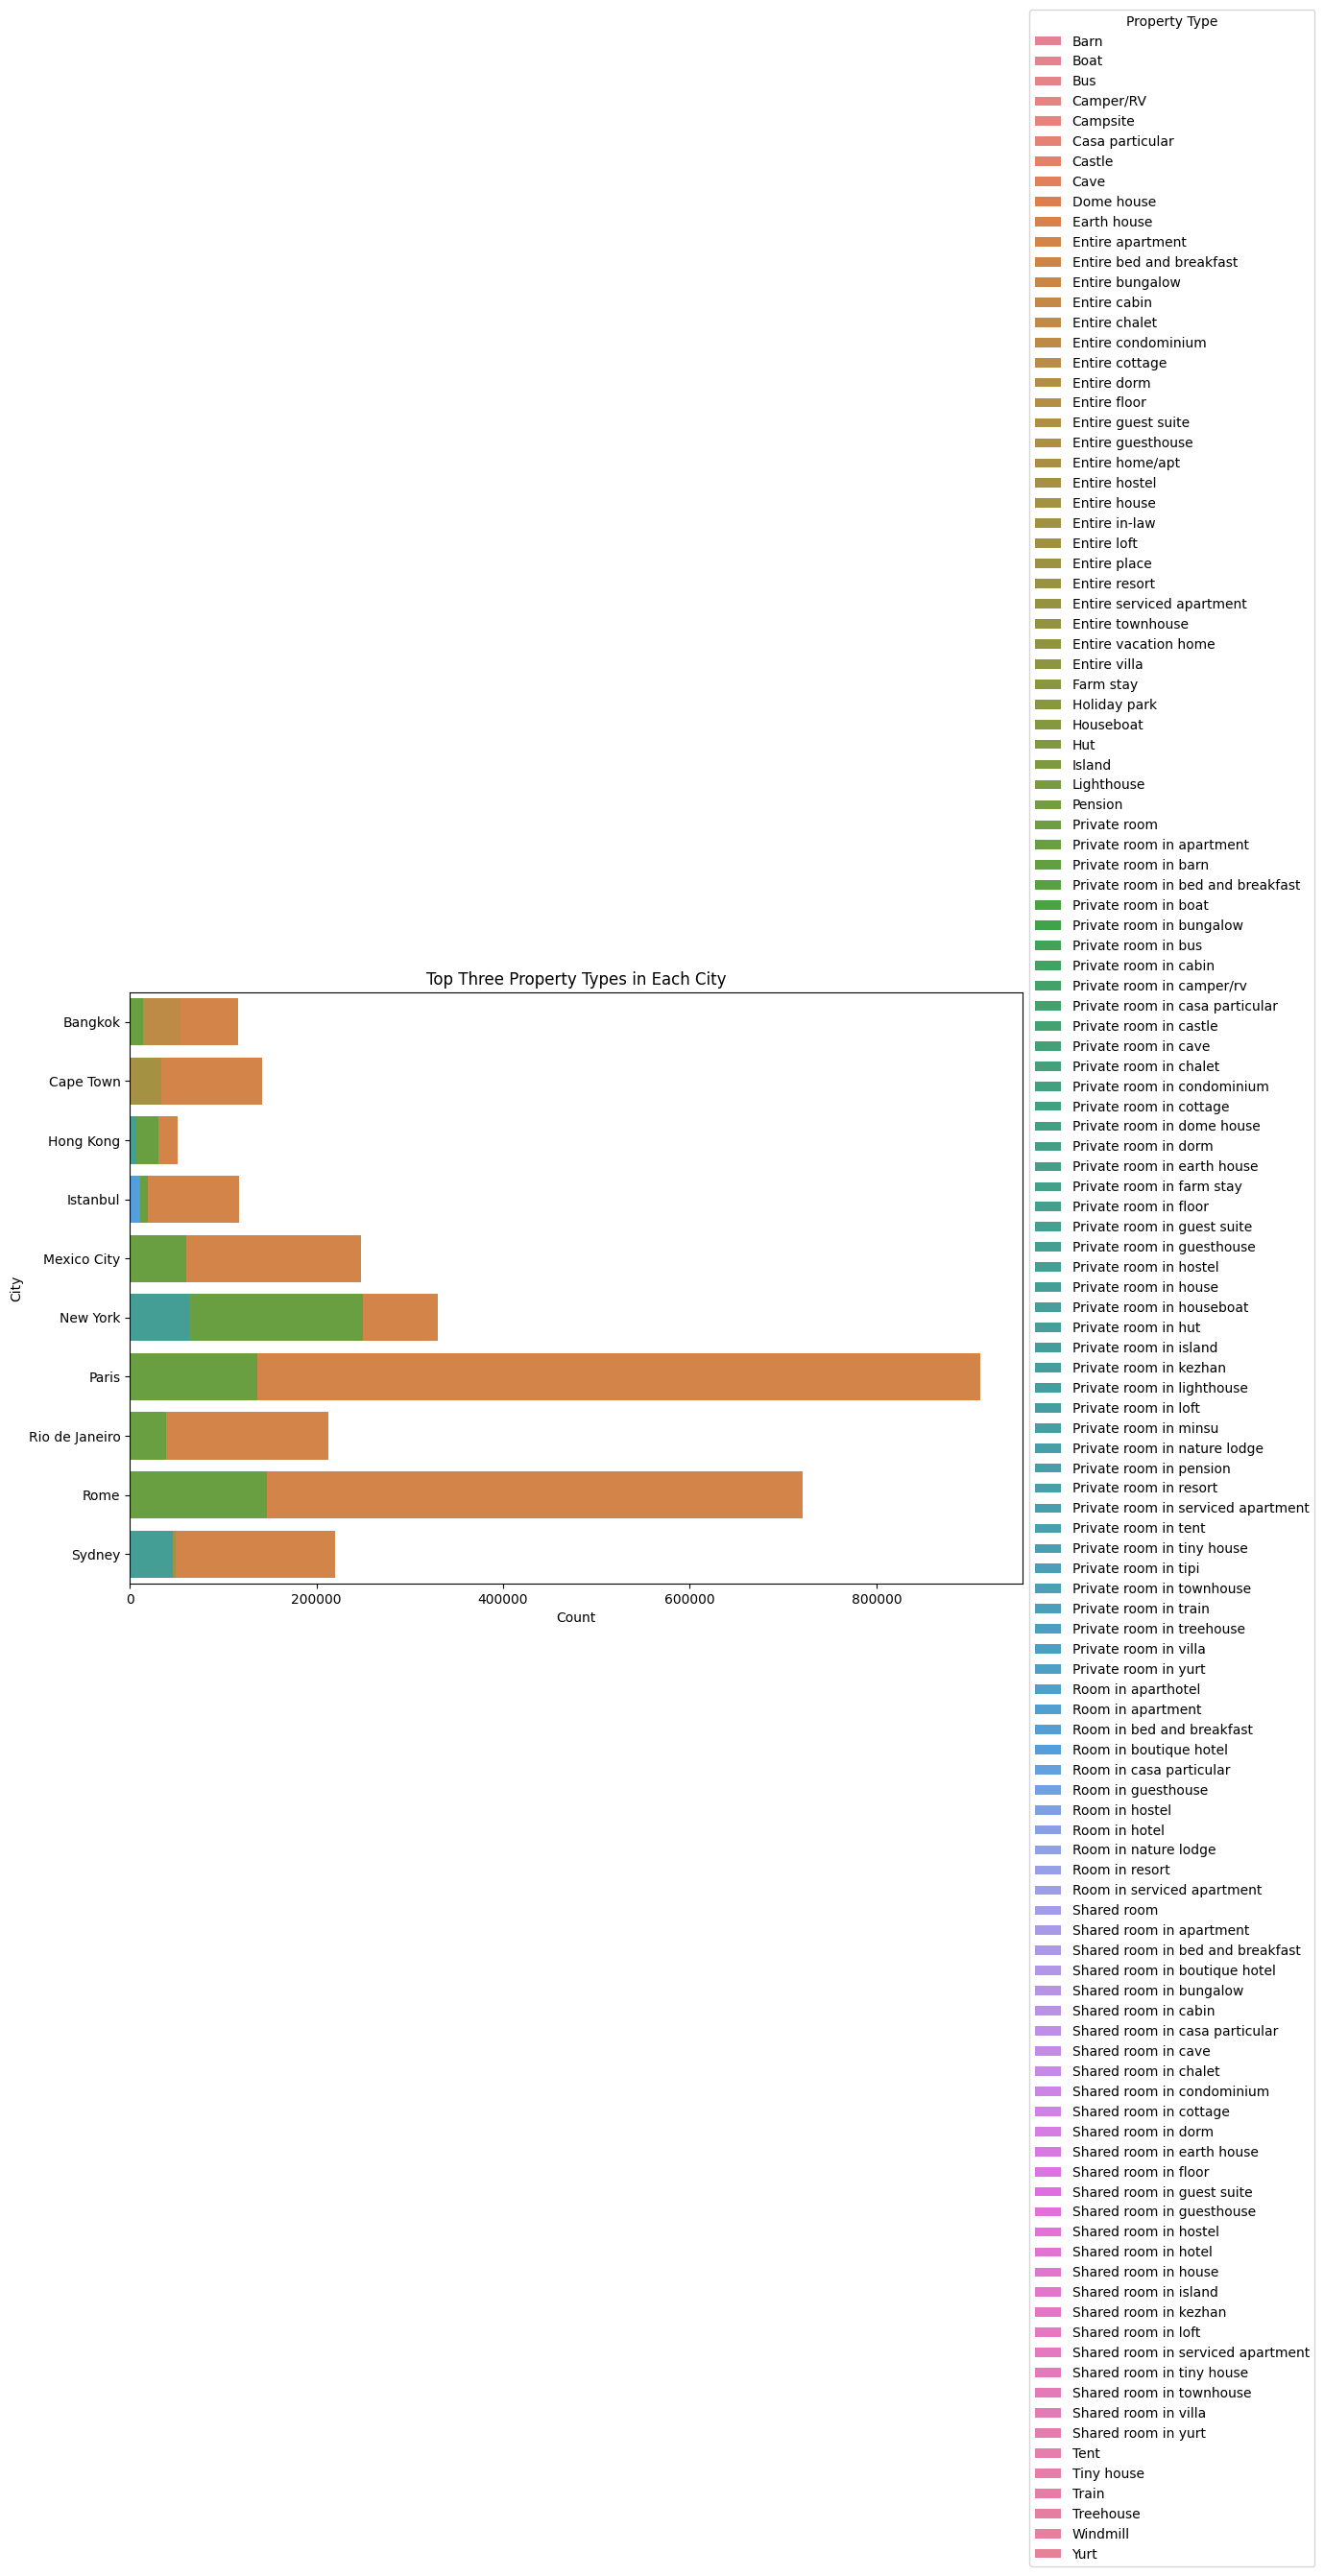

In [ ]:
# most popular property type in each city,

city_property_counts = merged_dataset.groupby(['city', 'property_type']).size().reset_index(name='count')
top_three_property = city_property_counts.groupby('city').apply(lambda x: x.nlargest(3, 'count'))

plt.figure(figsize=(12, 8))
sns.barplot(data=top_three_property, x='count', y='city', hue='property_type', dodge=False)
plt.title('Top Three Property Types in Each City')
plt.xlabel('Count')
plt.ylabel('City')
plt.legend(title='Property Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

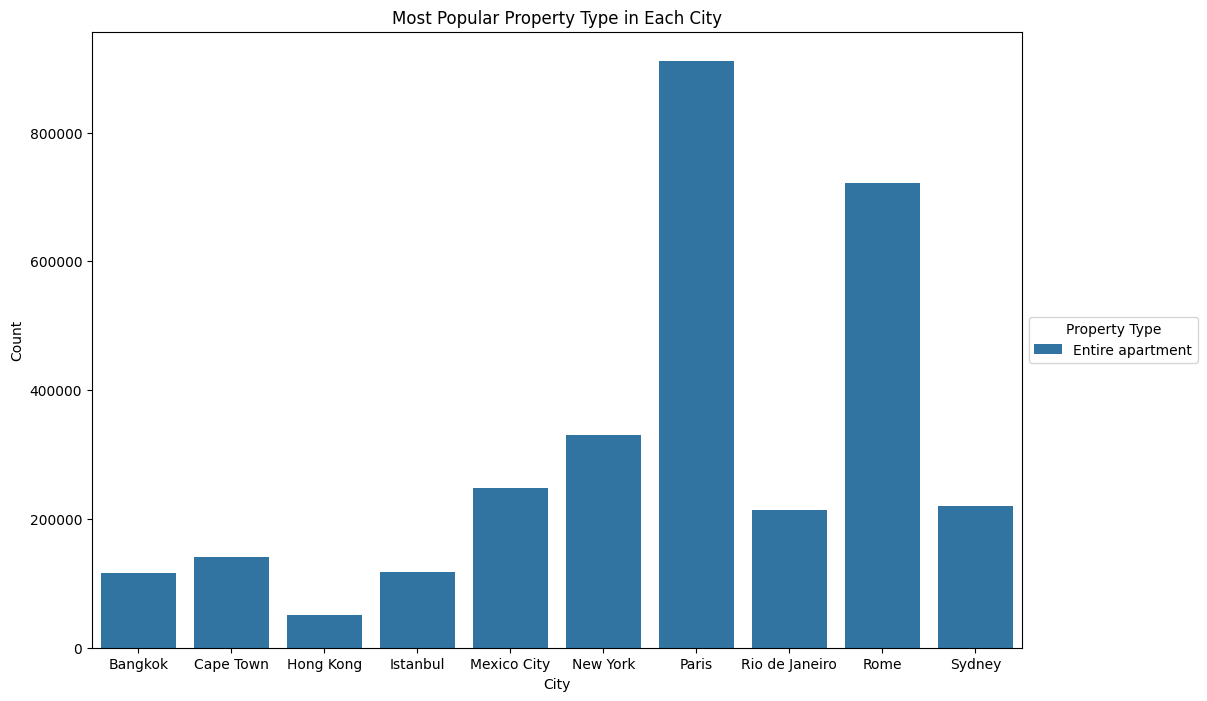

In [ ]:
city_property_counts = merged_dataset.groupby(['city', 'property_type']).size().reset_index(name='count')
most_popular_property = city_property_counts.groupby('city').apply(lambda x: x.loc[x['count'].idxmax()])

plt.figure(figsize=(12, 8))
sns.barplot(data=most_popular_property, x='city', y='count', hue='property_type', dodge=False)
plt.title('Most Popular Property Type in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Property Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Paris has most property type is "entire apartment"

In [ ]:
merged_dataset['room_type'].unique()

['Entire place', 'Private room', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire place', 'Hotel room', 'Private room', 'Shared room']

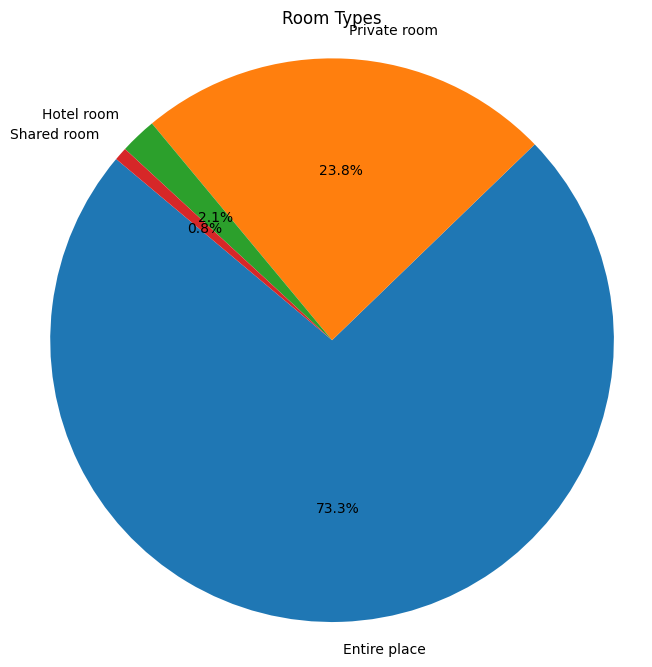

In [ ]:
# pie chart for room type
plt.figure(figsize=(8, 8))
plt.pie(merged_dataset['room_type'].value_counts(), labels=merged_dataset['room_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Room Types')
plt.axis('equal')
plt.show()

the most common room type is "Entire place" = 73.3%

<ipython-input-61-faf1995e6eae>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_dataset.corr()


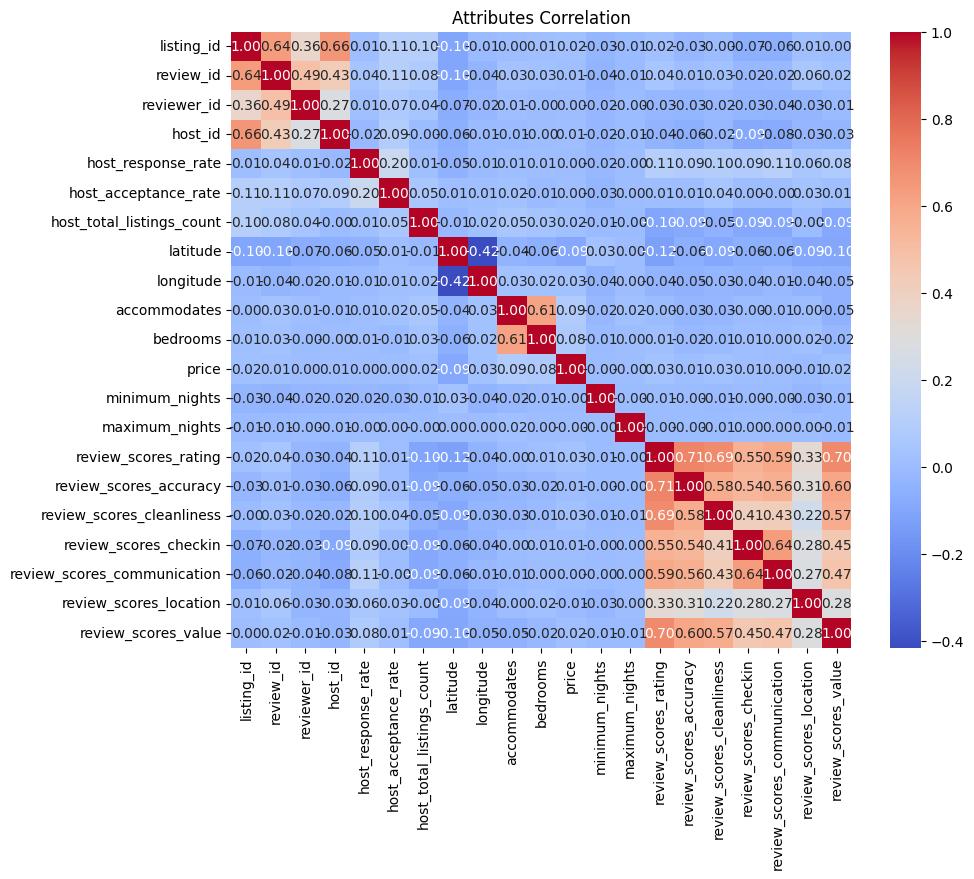

In [ ]:
# see relationship
#numerics = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights','review_scores_rating',
#            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#            'review_scores_communication', 'review_scores_location', 'review_scores_value' , 'price']

#numreics_data = merged_dataset[numerics]

correlation_matrix = merged_dataset.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Attributes Correlation')
plt.show()

## Calculate summary statistics for relevant variables

In [ ]:
# Numerical variables
print("** Price information **")
print("The mean of the price is :" , merged_dataset['price'].mean())
print("The median of the price is :" , merged_dataset['price'].median())
print("The minimum of the price is :" , merged_dataset['price'].min()) #Outlier
print("The maximum of the price is :" , merged_dataset['price'].max())
print("The Standared Divition of the price is :" , merged_dataset['price'].std())
print("******"*10)

print("** host_response_rate information **")
print(merged_dataset['host_response_rate'].describe())
print("******"*10)

print("** host_acceptance_rate information **")
print(merged_dataset['host_acceptance_rate'].describe())
print("******"*10)


** Price information **
The mean of the price is : 395.8410092565934
The median of the price is : 115.0
The minimum of the price is : 8.0
The maximum of the price is : 300177.0
The Standared Divition of the price is : 2423.2612507677127
************************************************************
** host_response_rate information **
count    5.373143e+06
mean     9.349517e-01
std      1.611400e-01
min      0.000000e+00
25%      9.349517e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: host_response_rate, dtype: float64
************************************************************
** host_acceptance_rate information **
count    5.373143e+06
mean     9.046293e-01
std      1.848102e-01
min      0.000000e+00
25%      9.046293e-01
50%      9.800000e-01
75%      1.000000e+00
max      1.000000e+00
Name: host_acceptance_rate, dtype: float64
************************************************************


In [ ]:
# categrical variables
category = ['host_has_profile_pic' , 'host_identity_verified' , 'neighbourhood' , 'property_type' , 'room_type' , 'instant_bookable']

for col in category:
    frequency_distribution = merged_dataset[col].value_counts()
    print("Frequency Distribution for", col, ":\n", frequency_distribution)
    print("*"*60)


Frequency Distribution for host_has_profile_pic :
 t    5366089
f       7054
Name: host_has_profile_pic, dtype: int64
************************************************************
Frequency Distribution for host_identity_verified :
 t    4685059
f     688084
Name: host_identity_verified, dtype: int64
************************************************************
Frequency Distribution for neighbourhood :
 I Centro Storico     737590
Cuauhtemoc           251668
Sydney               162721
Copacabana           128756
Buttes-Montmartre    118379
                      ...  
Engenho da Rainha         1
Gerritsen Beach           1
Nong Khaem                1
Ward 38                   1
Abolicao                  1
Name: neighbourhood, Length: 631, dtype: int64
************************************************************
Frequency Distribution for property_type :
 Entire apartment              3069076
Private room in apartment      749299
Entire condominium             203791
Private room in hous

In [ ]:
for col in category:
    mode_category = merged_dataset[col].mode()[0]
    print(" Mode for", col, ":\n", mode_category)
    print("*"*60)

 Mode for host_has_profile_pic :
 t
************************************************************
 Mode for host_identity_verified :
 t
************************************************************
 Mode for neighbourhood :
 I Centro Storico
************************************************************
 Mode for property_type :
 Entire apartment
************************************************************
 Mode for room_type :
 Entire place
************************************************************
 Mode for instant_bookable :
 f
************************************************************


# Step 4: Feature Engineering

## New coulmns

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373143 entries, 0 to 5373142
Data columns (total 35 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   listing_id                   float64 
 1   review_id                    float64 
 2   date                         object  
 3   reviewer_id                  float64 
 4   name                         object  
 5   host_id                      float64 
 6   host_since                   object  
 7   host_location                object  
 8   host_response_time           object  
 9   host_response_rate           float64 
 10  host_acceptance_rate         float64 
 11  host_is_superhost            category
 12  host_total_listings_count    float64 
 13  host_has_profile_pic         category
 14  host_identity_verified       category
 15  neighbourhood                category
 16  city                         category
 17  latitude                     float64 
 18  longitude             

In [ ]:
# Calculate the average rating based on multiple review scores.
merged_dataset['average_rating'] = merged_dataset[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'average_rating'],
      dtype='object')

In [ ]:
merged_dataset['average_rating']

0          22.571429
1          22.571429
2          22.571429
3          22.571429
4          22.571429
             ...    
5373138    19.428571
5373139     4.571429
5373140    22.285714
5373141     4.571429
5373142    22.857143
Name: average_rating, Length: 5373143, dtype: float64

In [ ]:
print(merged_dataset['average_rating'].max())
print(merged_dataset['average_rating'].min())
print(merged_dataset['average_rating'].mode())

22.857142857142858
4.571428571428571
0    22.571429
Name: average_rating, dtype: float64


In [ ]:
# calculate the occupancy rate based on the number of minimum nights and maximum nights the property is available for booking.
merged_dataset['occupancy_rate'] = (merged_dataset['minimum_nights'] / merged_dataset['maximum_nights']) * 100
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'average_rating',
       'occupancy_rate'],
      dtype='object')

In [ ]:
merged_dataset['occupancy_rate']

0          10.000000
1          10.000000
2          10.000000
3          10.000000
4          10.000000
             ...    
5373138     7.142857
5373139     7.142857
5373140     3.333333
5373141     0.088889
5373142     0.088889
Name: occupancy_rate, Length: 5373143, dtype: float64

In [ ]:
# Calculate the average price per person based on accommodates.
merged_dataset['price_per_accommodation'] = merged_dataset['price'] / merged_dataset['accommodates']
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'average_rating',
       'occupancy_rate', 'price_per_accommodation'],
      dtype='object')

In [ ]:
merged_dataset['price_per_accommodation'].unique()

array([36.66666667, 33.        , 14.        , ...,  5.28571429,
        7.72727273,  6.57142857])

In [ ]:
merged_dataset.head()

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,average_rating,occupancy_rate,price_per_accommodation
0,11798.0,330265172.0,2018-09-30,11863072.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,10.0,f,22.571429,10.0,36.666667
1,11798.0,437228860.0,2019-04-14,3153099.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,10.0,f,22.571429,10.0,36.666667
2,11798.0,274915772.0,2018-06-10,13021254.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,10.0,f,22.571429,10.0,36.666667
3,11798.0,284327934.0,2018-07-01,74131694.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,10.0,f,22.571429,10.0,36.666667
4,11798.0,223467265.0,2018-01-01,39665778.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,10.0,f,22.571429,10.0,36.666667


In [ ]:
merged_dataset.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'name', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'average_rating',
       'occupancy_rate', 'price_per_accommodation'],
      dtype='object')

In [ ]:
merged_dataset['amenities']

0          ["Essentials", "Hot water", "Hangers", "Smoke ...
1          ["Essentials", "Hot water", "Hangers", "Smoke ...
2          ["Essentials", "Hot water", "Hangers", "Smoke ...
3          ["Essentials", "Hot water", "Hangers", "Smoke ...
4          ["Essentials", "Hot water", "Hangers", "Smoke ...
                                 ...                        
5373138    ["Free parking on premises", "Shampoo", "Washe...
5373139    ["Free parking on premises", "Shampoo", "Hot t...
5373140    ["Free parking on premises", "Washer", "TV", "...
5373141    ["Shampoo", "TV", "Fire extinguisher", "Wifi",...
5373142    ["Dishwasher", "Body soap", "Washer", "Dedicat...
Name: amenities, Length: 5373143, dtype: object

In [ ]:
# Count the number of amenities provided by the host.
merged_dataset['num_amenities'] = merged_dataset['amenities'].apply(lambda x: len(x.split(',')))

In [ ]:
print(merged_dataset['num_amenities'].unique())
print("the min number of amenities" , merged_dataset['num_amenities'].min())
print("the max number of amenities" , merged_dataset['num_amenities'].max())


[25 21 26 27 13 30 49 31 17 16 28 20 48 42 34 44 15 18  7 22 23 19 24 38
 33  9 43 40 39  6 55 29 32  3 51 45 11 14 10  4 12 35  8 36 37 41 63 59
  5 46 47 54  1 60 53  2 52 56 57 62 83 50 58 66 61 64 65 69 71 70 68 73
 67 76 81 72 77 74 89]
the min number of amenities 1
the max number of amenities 89


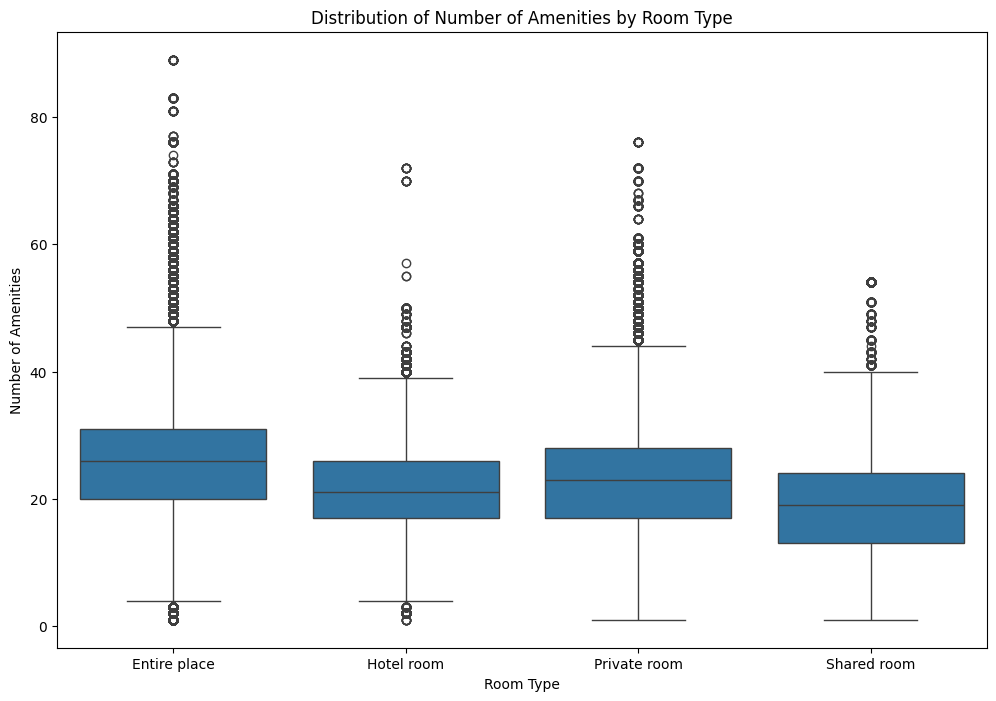

In [ ]:
# the distribution of number the amenities for each room type
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_dataset, x='room_type', y='num_amenities')
plt.title('Distribution of Number of Amenities by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Amenities')
plt.show()

The number of amenities based on room type we can see that "Entire place" room type has between 5 to 50 amenities approximetly and the "hotel room" has the lowest number of amenities

## Encoding

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373143 entries, 0 to 5373142
Data columns (total 39 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   listing_id                   float64 
 1   review_id                    float64 
 2   date                         object  
 3   reviewer_id                  float64 
 4   name                         object  
 5   host_id                      float64 
 6   host_since                   object  
 7   host_location                object  
 8   host_response_time           object  
 9   host_response_rate           float64 
 10  host_acceptance_rate         float64 
 11  host_is_superhost            category
 12  host_total_listings_count    float64 
 13  host_has_profile_pic         category
 14  host_identity_verified       category
 15  neighbourhood                category
 16  city                         category
 17  latitude                     float64 
 18  longitude             

In [ ]:
label_encoder = LabelEncoder()

binary_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for col in binary_columns:
    merged_dataset[col] = label_encoder.fit_transform(merged_dataset[col])

In [ ]:
merged_dataset.head()

,listing_id,review_id,date,reviewer_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,average_rating,occupancy_rate,price_per_accommodation,num_amenities
0,11798.0,330265172.0,2018-09-30,11863072.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,0,22.571429,10.0,36.666667,25
1,11798.0,437228860.0,2019-04-14,3153099.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,0,22.571429,10.0,36.666667,25
2,11798.0,274915772.0,2018-06-10,13021254.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,0,22.571429,10.0,36.666667,25
3,11798.0,284327934.0,2018-07-01,74131694.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,0,22.571429,10.0,36.666667,25
4,11798.0,223467265.0,2018-01-01,39665778.0,Loft very charming in Paris,44444.0,2009-10-08,"Paris, Ile-de-France, France",within an hour,0.934952,...,10.0,10.0,10.0,10.0,10.0,0,22.571429,10.0,36.666667,25


# Conclusion

## Summarize the findings from the exploratory data analysis:

Upon examination, we found that the dataset comprises 5373143 row and 36 column after merged two dataset list and review. The data includes a variety of numerical (eg. minimum_nights , price, bedrooms accommodates and more) and categorical (eg. room_type, property_type, instant_bookable  and more), with some missing values observed in certain columns like: name has 333 null value and district with 4525416 null values and more. I noticed that the distribution is in the price column has Positive Skewness (Right Skewed) and the distribution of review scores rating has Negative Skewness (Left Skewed).

## Discuss any insights or patterns observed in the data:
- From heatmap I observed a strong positive correlation between "review scores cleanliness" and  "review scores rating", suggesting that properties with higher ratings for cleanliness tend to also receive higher overall ratings from guests. This insight underscores the importance of maintaining cleanliness standards in accommodations, as it directly impacts guest satisfaction and overall ratings.

- From 'Average Accomodation Price in Each City' bar chart Rome having the lowest average price and Bangkok having the highest, This suggests that travelers may find Rome to be a relatively affordable destination compared to others in the dataset but  Bangkok emerges as the city with the highest average accommodation price, indicating that it may be perceived as a premium or higher-end destination compared to others in the dataset The popularity of Bangkok as a tourist destination, coupled with strong demand, may contribute to higher accommodation prices, as supply and demand dynamics influence pricing in the market.

- Based on the visualization showing the most popular property type in each city, with 'entire apartment' being the most prevalent type and Paris having the highest number of entire apartments followed by Rome, New York, and Hong Kong, I can draw several insights:

 - 1)The prevalence of 'entire apartment' as the most popular property type across
multiple cities suggests a universal preference among travelers for this accommodation type. It may offer a combination of privacy, space, and amenities that appeal to a wide range of travelers, from families to adventurers..

 - 2)The high number of entire apartments in Paris reflects its reputation as a global cultural and economic hub, attracting a diverse array of visitors seeking long-term or short-term accommodations in the heart of the city.

 - 3)The lower prevalence of entire apartments in Hong Kong could be influenced by factors such as limited space, high property prices, and a preference for alternative accommodation options like hotels or serviced apartments.

- Based on the box plot visualization showing the distribution of the number of amenities by room type, with 'entire place' having the highest number of amenities followed by private room and shared room, while hotel room has the lowest number of amenities, you can draw several insights:
 - 1)The higher number of amenities associated with 'entire place' accommodations suggests that hosts or property managers strive to provide a comprehensive range of facilities and services to enhance the guest experience.
 - 2)Private room and shared room accommodations typically offer a moderate number of amenities compared to 'entire place' listings. While they may not provide the same level of privacy and exclusivity as entire accommodations, they still offer essential amenities to ensure guests' comfort and convenience during their stay.
 - 3)The lower number of amenities associated with hotel rooms reflects that hotels may differentiate themselves based on service quality, brand reputation, and location rather than the sheer number of amenities offered. Guests may prioritize factors such as convenience, accessibility, and personalized service when choosing hotel accommodations.





## Make recommendations based on the analysis conducted:
Several suggestions for both visitors and hospitality industry stakeholders can be made based on the analysis that was done:

1. **Prioritize Cleanliness Standards**: It is imperative that lodging providers give priority to cleanliness standards because of the significant positive association that has been shown between review scores for cleanliness and overall ratings. Having regular maintenance and strict cleaning procedures in place can help increase visitor happiness and favorable feedback.

2. **Competitive Pricing Strategies**: In locations like Bangkok where the average cost of lodging is greater, lodging providers should make sure that their pricing strategies reflect the perceived value of their services. Affordability can also be used as a competitive advantage by places with lower average rates, like Rome, to draw tourists on a tight budget.

3. **Diversify Property Offerings**: Accommodation providers should consider diversifying their property offerings to meet the varied preferences of travelers. While 'entire apartment' listings are popular across multiple cities, there is still demand for other types of accommodations such as private rooms and shared rooms. Offering a diverse range of options can attract a broader customer base.

By implementing these recommendations, stakeholders can enhance the overall guest experience, drive customer satisfaction, and achieve business success in the competitive hospitality industry.